In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import functools
import seaborn as sns

Fontconfig warning: ignoring UTF-8: not a valid region tag


# I. Data descripion

### Task 

The goal is to prepare the data and describe it. The data is real and contains missing values, as well as data that is redundant relative to each other. <br>

Combine the datasets (except for `students.scv`) into one common one for further work. Create a separate dataset to calculate the average age of course students (a separate dataset with `students.scv` is needed in order not to lose values in the main dataset due to the fact that not all students have personal data on their date of birth). <br> <br>
Describe the data: <br>
1. **(p)** Count
       * total number of courses in the dataset,
       * number of modules in each course,
       * number of lessons in each module in each course,
       * median number of lessons per module in each course,
       * number of students in each course
       * minimum, maximum, average, median age of students
       * minimum, maximum, average, median age of students in each course
2. **(m)** Construct a bar-chart reflecting the number of students in each course. Ticks need to be expanded so that they are readable
3. **(m)** Construct a horizontal (columns should be horizontal) bar-chart reflecting the number of students in each course. The graph must have a title. The values must be sorted. The color of the columns should contain information about the area to which the course belongs (that is, a legend is needed). Transparency should be at 0.1. The median line should be plotted on the graph. The median must have its own color. The graph should not have a frame. 
4. Based on the calculated values, describe the data (the description should be complete and cover all the metrics obtained above)

In [2]:
course_contents = pd.read_csv('Data/course_contents.csv')
courses = pd.read_csv('Data/courses.csv')
progress_phases = pd.read_csv('Data/progress_phases.csv')
progresses = pd.read_csv('Data/progresses.csv')
students = pd.read_csv('Data/students.csv')

In [3]:
courses = courses.rename({'id': 'course_id', 'title': 'course_title'}, axis='columns')
courses.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
progresses_and_phases = progress_phases.merge(progresses, how = 'left', left_on = 'progress_id', right_on = 'id')

In [5]:
progresses_and_phases.drop('id', axis=1, inplace=True)

In [6]:
сourse_contents_courses = course_contents.merge(courses, how = 'left', left_on = 'course_id', right_on = 'course_id')

In [7]:
df_merged = progresses_and_phases.merge(сourse_contents_courses, how = 'outer', left_on = ['course_id', 'module_number', 'lesson_number'] , right_on = ['course_id', 'module_number', 'lesson_number']).dropna(subset = ['progress_id', 'student_id'])

##### 1.1.

Total number of courses in the dataset:

In [8]:
df_merged.course_id.nunique()

15

Number of modules per course

In [9]:
df1 = df_merged.groupby('course_title')['module_number'].nunique().to_frame()
df1

,module_number
course_title,
Excel Базовый,9
Java-разработчик,17
Java-разработчик c нуля,9
JavaScript с нуля,18
PHP-разработчик с 0 до PRO. Часть 1,8
SMM-маркетолог от А до Я,11
UX-дизайн,20
Анимация интерфейсов,21
Веб-вёрстка для начинающих 2.0,8


Number of lessons in each module in each course

In [10]:
df_2 = df_merged.groupby(['course_title', 'module_title']).lesson_number.nunique()
df_2 = pd.DataFrame(df_2)
df_2

lesson_number
course_title                  module_title                                                     
Excel Базовый                  Визуализация данных Excel                                      5
                              Основной функционал Excel                                      11
                              Основной функционал Excel (продолжение)                         7
                              Сводные таблицы Excel                                           5
                              Формулы и функции Excel. Более сложные формулы                  5
...                                                                                         ...
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                               5
                              Требовательность digital-продюсера                              4
                              Управление временем                                             4
                              Управление дизайнерами. Разработка дизайна по s...              7
                              Экологичный путь менеджера                                      4

[229 rows x 1 columns]

Median number of lessons per module per course

In [12]:
df_3 = df_2.unstack().mean(axis=1).round(0).to_frame()
df_3.columns = ['median number of lessons per module per course']
df_3

,median number of lessons per module per course
course_title,
Excel Базовый,5.0
Java-разработчик,7.0
Java-разработчик c нуля,13.0
JavaScript с нуля,7.0
PHP-разработчик с 0 до PRO. Часть 1,5.0
SMM-маркетолог от А до Я,6.0
UX-дизайн,4.0
Анимация интерфейсов,3.0
Веб-вёрстка для начинающих 2.0,7.0


In [13]:
#Combining dataframes of the number of modules and the median number of lessons per course.
df_mod_q_vs_lesson_q_mean = df1.merge(df_3, how = "outer", left_on = "course_title", right_on = "course_title")
df_mod_q_vs_lesson_q_mean

,module_number,median number of lessons per module per course
course_title,,
Excel Базовый,9,5.0
Java-разработчик,17,7.0
Java-разработчик c нуля,9,13.0
JavaScript с нуля,18,7.0
PHP-разработчик с 0 до PRO. Часть 1,8,5.0
SMM-маркетолог от А до Я,11,6.0
UX-дизайн,20,4.0
Анимация интерфейсов,21,3.0
Веб-вёрстка для начинающих 2.0,8,7.0


Number of students in each course

In [14]:
df_4 = df_merged.groupby('course_title').student_id.nunique().to_frame()
df_4.columns = ['Number of students']
df_4.sort_values(by = 'Number of students', ascending=False) 

,Number of students
course_title,
Интернет-маркетолог от Ingate,2168
Веб-дизайн с нуля 2.0,2014
Веб-вёрстка для начинающих 2.0,2004
Веб-дизайн PRO 2.0,1711
UX-дизайн,1151
JavaScript с нуля,966
PHP-разработчик с 0 до PRO. Часть 1,854
Excel Базовый,782
Java-разработчик,763


In [15]:
students 

,id_,id,city,birthday
0,1325,35e8a1938b9a33d5e45c8f4451c4309a,NaN,NaN
1,7503,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23
2,8972,2033122d7c9b24b36eebc468d5259642,NaN,NaN
3,9235,a6ae278c0eab719b3784e5ea147c128f,Москва,NaN
4,9588,51b25c9afd20d178ef3c07276df38e2d,Великий Новгород,NaN
...,...,...,...,...
43825,124251,a65ccacbe0226b345f195d02e676aa04,NaN,2000-11-21
43826,124338,148f1375e4135e779053a0d4b2a63857,NaN,1999-10-20
43827,124363,05fa419f832fa78ad6e7a5f90b0f71e6,NaN,NaN
43828,124377,9ff58c490f6ee5b013e7f62140ee3d79,NaN,1998-04-18


Minimum, maximum, average, median age of students.

**To clear the data from erroneously filled-in data, set the condition that the student of the course could have received 9 years of school education during his life and he is not older than the oldest person alive at the moment (Japanese resident Kane Tanaka - 117 years old)**

In [17]:
students = pd.read_csv('Data/students.csv')
students.dropna(inplace=True)
students['birthday'] = pd.to_datetime(students['birthday'], dayfirst=False, yearfirst=True, errors = 'coerce')
students['age'] = students["birthday"].apply(lambda x : (pd.Timestamp.now().year - x.year))
students_adeq = students[(students['age'] > 15)&(students['age'] <= 117)] 

min_age = students_adeq['age'].min()
max_age = students_adeq['age'].max()
mean_age = students_adeq['age'].mean()

print(min_age)
print(max_age)
print(mean_age)

16.0
104.0
33.28112521075517


In [18]:
df_merged

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,module_title,lesson_title,lesson_token,is_video,is_homework,course_title,field
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,Веб-дизайн PRO 2.0,Design
1,3b9dce04f32da32763124602557f92a3,2,4,done,2019-03-18 14:23:17.328374+00,2019-03-18 14:54:50.979612+00,03151bc73bdb29fe1be1443c6d83e22f,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,Веб-дизайн PRO 2.0,Design
2,73e17a05355852fe65b785c82c37d1ad,2,4,done,2019-07-09 09:18:46.19862+00,2019-07-11 08:03:09.222385+00,ed235f47e16da6e83d3f1cb511f38ea6,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,Веб-дизайн PRO 2.0,Design
3,cc3eb34ae49c719648352c4175daee88,2,4,done,2018-07-27 15:39:17.666629+00,2018-07-27 16:13:55.086871+00,59e8681cb7b5c8043ae1aac10c8053ca,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,Веб-дизайн PRO 2.0,Design
4,04ace4fe130d90c801e24eea13ee808e,2,4,done,2019-04-24 18:42:40.272854+00,2019-04-24 18:44:57.507857+00,c16250079190337fe9074736e33eecb2,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,Веб-дизайн PRO 2.0,Design
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350672,7c46c781a54bf9d17f24b4920df4f7eb,9,14,start,2019-07-03 18:46:02.766878+00,NaN,1a0acf593d0a38155bafdf29e3cba338,943306102e5b067d08a29094f37b8193,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True,Java-разработчик c нуля,Development
350673,56a9cb904c20cd2fcfa8104f87f988a7,9,14,wait,2019-07-09 05:44:55.574679+00,NaN,ed93dfa830d97cf67eb047dd7a4aa181,943306102e5b067d08a29094f37b8193,Работа с файлами и сетью,Домашняя работа,014b119e-7d3e-47dc-bf02-ef10e8366e81,False,True,Java-разработчик c нуля,Development
350674,f6216204f2c65eea37f913cfa5e4eb6a,9,15,done,2019-07-03 09:49:03.510925+00,2019-07-03 18:22:44.796645+00,c21fa1f7fa61d11253e4cc8eeeb03027,943306102e5b067d08a29094f37b8193,Работа с файлами и сетью,Конфигурационные файлы,3e4af8ad-2c75-4e7f-9fcb-c8f7074ce208,True,False,Java-разработчик c нуля,Development
350675,45289b36f4827d49d9d3757fc9486ca0,9,15,done,2019-07-11 12:18:11.684534+00,2019-07-11 17:46:08.426039+00,4e5f1ba884ba5759c07cf6e942ae5e98,943306102e5b067d08a29094f37b8193,Работа с файлами и сетью,Конфигурационные файлы,3e4af8ad-2c75-4e7f-9fcb-c8f7074ce208,True,False,Java-разработчик c нуля,Development


Dataframe for further work:

In [27]:
df = df_merged.merge(students_adeq, how = 'outer', left_on = 'student_id', right_on = 'id').dropna(subset = ['progress_id', 'student_id'])

Minimum, maximum, average, median age of students in each course

In [20]:
df_4 = df.groupby('course_title').age.min().to_frame()
df_4.columns = ['min age']
df_4

,min age
course_title,
Excel Базовый,20.0
Java-разработчик,18.0
Java-разработчик c нуля,18.0
JavaScript с нуля,17.0
PHP-разработчик с 0 до PRO. Часть 1,17.0
SMM-маркетолог от А до Я,21.0
UX-дизайн,18.0
Анимация интерфейсов,18.0
Веб-вёрстка для начинающих 2.0,17.0


In [21]:
df_5 = df.groupby('course_title').age.max().to_frame()
df_5.columns = ['min age']
df_5

,min age
course_title,
Excel Базовый,64.0
Java-разработчик,68.0
Java-разработчик c нуля,58.0
JavaScript с нуля,63.0
PHP-разработчик с 0 до PRO. Часть 1,78.0
SMM-маркетолог от А до Я,55.0
UX-дизайн,88.0
Анимация интерфейсов,54.0
Веб-вёрстка для начинающих 2.0,63.0


In [22]:
df_6 = df.groupby('course_title').age.mean().round(0).to_frame()
df_6.columns = ['mean age']
df_6

,mean age
course_title,
Excel Базовый,37.0
Java-разработчик,33.0
Java-разработчик c нуля,33.0
JavaScript с нуля,32.0
PHP-разработчик с 0 до PRO. Часть 1,34.0
SMM-маркетолог от А до Я,32.0
UX-дизайн,34.0
Анимация интерфейсов,33.0
Веб-вёрстка для начинающих 2.0,32.0


##### 1.3. Number of students in each course

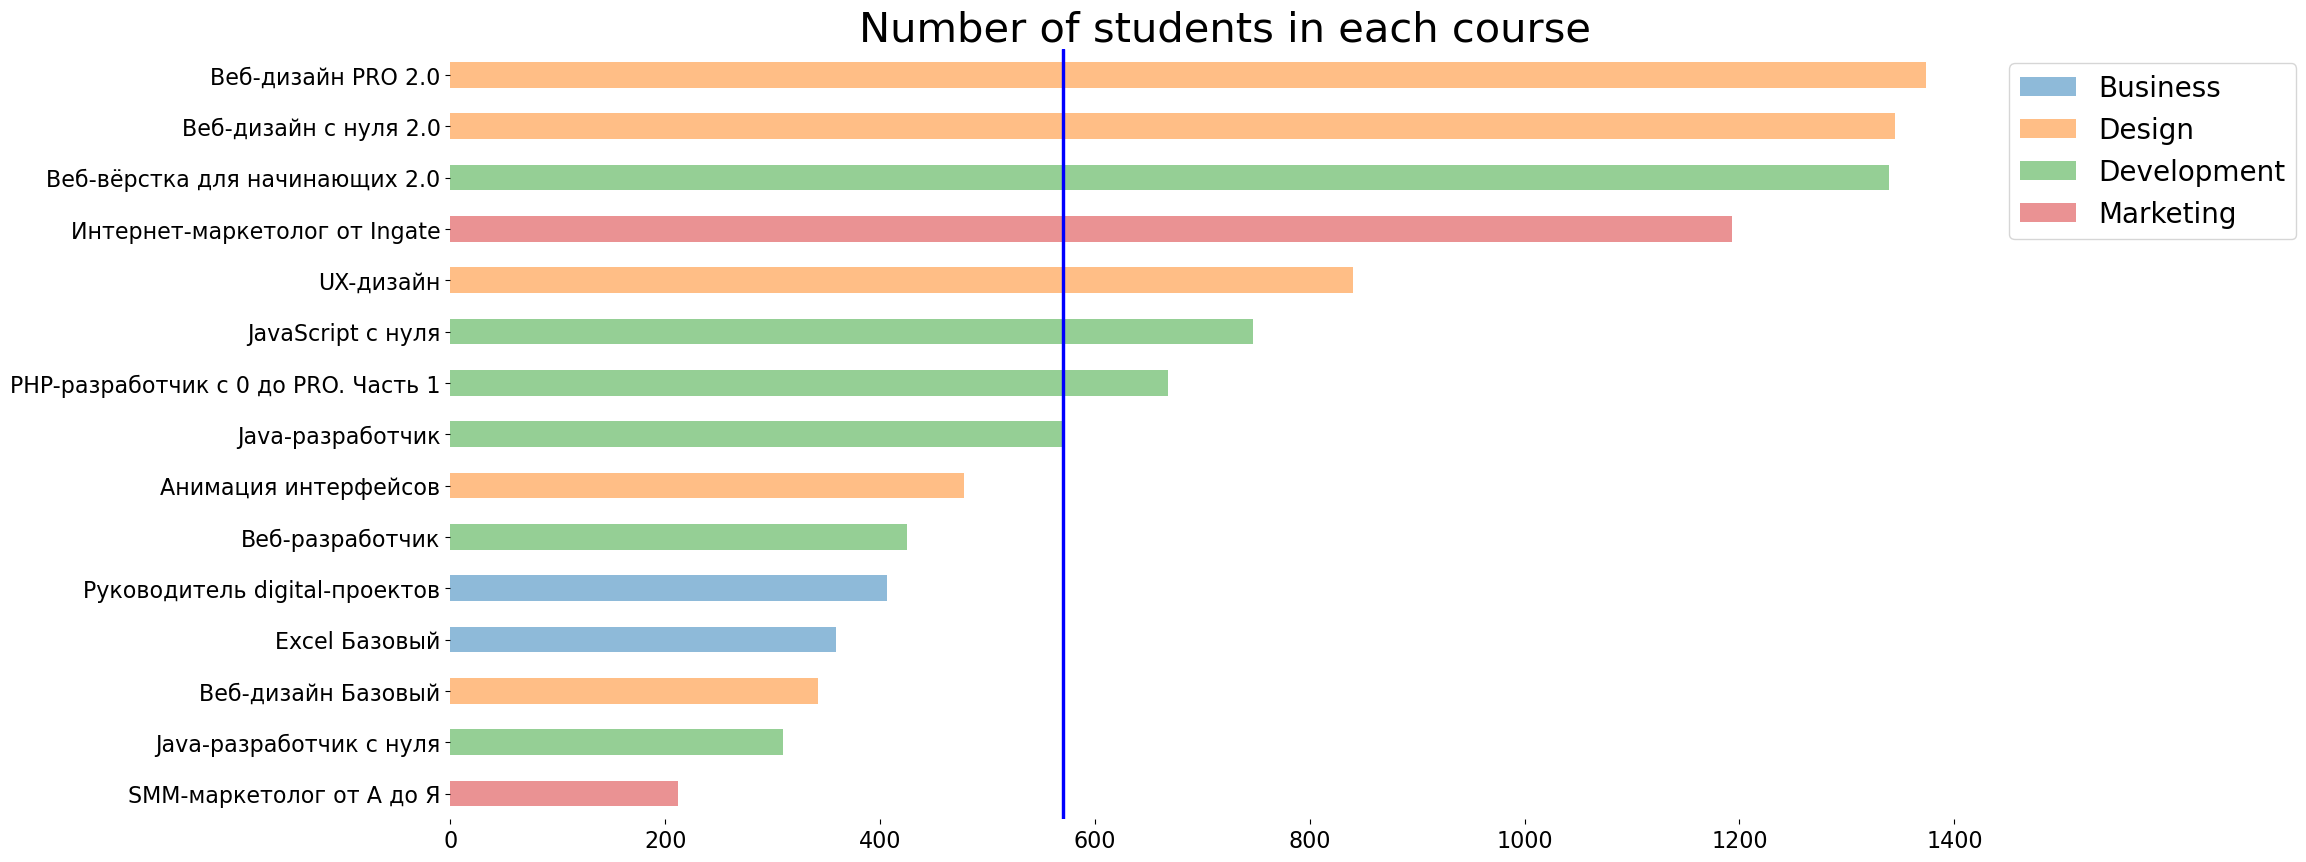

In [25]:
fig, ax = plt.subplots(figsize=(20,10))

df_stud_q_bar_2 = df.groupby(['field', 'course_title'])['id'].nunique().to_frame()
df_stud_q_bar_2_2 = df_stud_q_bar_2.unstack(['field']).fillna(0)
df_stud_q_bar_2_2.columns = ['Business','Design','Development','Marketing']
df_stud_q_bar_2_2['sort'] = df_stud_q_bar_2_2.sum(1)
df_stud_q_bar_2_2 = df_stud_q_bar_2_2.sort_values(by='sort')
plot_data = df_stud_q_bar_2_2[['Business','Design','Development','Marketing']]

ax = plot_data.plot.barh(fontsize=16
        , title='Number of students in each course',
          alpha = 0.5, ax=ax, stacked = True)
ax.title.set_size(30)
ax.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=20)
ax.set(ylabel=None, xlabel=None)
med = df_stud_q_bar_2['id'].median()
ax.axvspan(xmin = med-1, xmax = med+1, color='b', linestyle='-')
plt.box(False)
plt.show()

##### 1.4. Data Description

- As we can see from the frame **df_mod_q_vs_lesson_q_mean** - the more models in the course, the fewer lessons in the module. What is logical: The module is the topic of the lessons. The more topics (a course) a course is divided into, the fewer lessons it contains.
- The most popular specialties are related to Internet marketing and the creation of web interfaces. Design is the most popular field of knowledge.
- People start taking courses at school. And the oldest students are the longest-livers. Although, this may have been an error in data collection. On average, the student's age is 30+. It is explainable. Usually at this age people begin to receive additional benefits. education related to the current profession, or vice versa, having reached moral or financial barriers, they begin to receive education for a future change of activity.

# II. Calculation of the potential load on teachers

### Task 

1. **(p)** Calculate the growth of students in each course in each month throughout history (each month in the range from March 2016 to July 2019 inclusive). Consider the student's start date for the course based on the start date of the first homework.
2. **(m)** Based on the first point, construct a line-graph with the increase in students in each month for each course. 15 charts. Graphs must have titles and axes must be labeled. Ticks need to be expanded so that they are readable.
3. **(m)** Based on the first point, construct a line-graph with several lines reflecting the growth of students in each month for each course. 15 lines on the chart. Ticks need to be expanded so that they are readable. The graph must have a title. The axis reflecting the increase must be labeled. The line for each course must have its own color (a legend is needed). The schedule should not have any frames 
4. **(p)** Calculate the number of homework progresses in each month throughout history (each month in the range from March 2016 to July 2019 inclusive) for each course. Take into account that completing homework can flow from one month to another (such tasks must be included in the total number of progress for all months covered by the deadline for completing these tasks)
5. **(m)** Construct a line-graph according to the fourth point. 15 charts. Graphs must have titles and axes must be labeled. Ticks need to be expanded so that they are readable
6. **(m)** Construct one line-graph for all courses on the fourth point. 15 lines on the chart. Ticks need to be expanded so that they are readable. The graph must have a title. The axis reflecting the number of progress must be signed. The line for each course must have its own color (a legend is needed). The schedule should not have any frames 
7. Based on the calculated values, draw an analytical conclusion (must be complete and cover all the metrics obtained above)

In [29]:
df_merged.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,module_title,lesson_title,lesson_token,is_video,is_homework,course_title,field
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00,2018-06-23 08:28:52.439542+00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,Веб-дизайн PRO 2.0,Design
1,3b9dce04f32da32763124602557f92a3,2,4,done,2019-03-18 14:23:17.328374+00,2019-03-18 14:54:50.979612+00,03151bc73bdb29fe1be1443c6d83e22f,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,Веб-дизайн PRO 2.0,Design
2,73e17a05355852fe65b785c82c37d1ad,2,4,done,2019-07-09 09:18:46.19862+00,2019-07-11 08:03:09.222385+00,ed235f47e16da6e83d3f1cb511f38ea6,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,Веб-дизайн PRO 2.0,Design
3,cc3eb34ae49c719648352c4175daee88,2,4,done,2018-07-27 15:39:17.666629+00,2018-07-27 16:13:55.086871+00,59e8681cb7b5c8043ae1aac10c8053ca,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,Веб-дизайн PRO 2.0,Design
4,04ace4fe130d90c801e24eea13ee808e,2,4,done,2019-04-24 18:42:40.272854+00,2019-04-24 18:44:57.507857+00,c16250079190337fe9074736e33eecb2,c9fcb746d51e41bc5a217002d081454b,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False,Веб-дизайн PRO 2.0,Design


In [33]:
#Format the main dataframe to work with dates
df_merged['start_date'] = pd.to_datetime(df_merged['start_date'], format='mixed')
df_merged['finish_date'] = pd.to_datetime(df_merged['finish_date'],  format='mixed')

In [34]:
df_c = df_merged.copy() #ro work with a copy so as not to damage the data of the main frame

##### 2.1. Calculation of student growth in each course in each month for each month in the range from March 2016 to July 2019 inclusive

In [35]:
df_all = df_c[(df_c['start_date']>='2016-03-01')&(df_c['start_date']<='2019-07-31')&(df_c['is_homework']==True)]
#select records in the required time range, including calculations of the start and end times of the course
# are based on the condition: “Consider the start date of the student’s course according to the start date of the first homework”

In [36]:
df_all['start_y_m'] = df_all['start_date'].dt.strftime('%Y-%m')
df_all['finish_y_m'] = df_all['finish_date'].dt.strftime('%Y-%m')

/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/205481954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['start_y_m'] = df_all['start_date'].dt.strftime('%Y-%m')
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/205481954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['finish_y_m'] = df_all['finish_date'].dt.strftime('%Y-%m')


In [37]:
firts_hw_mod_n = df_c[df_c['is_homework']==True].groupby(['course_title']).module_number.min().reset_index() #номер модуля с первым дз на курсе 

In [38]:
df_all_first_hw_mod_n = df_all.merge(firts_hw_mod_n, how = 'outer', left_on = ['course_title'], right_on = ['course_title']) \
                        .rename(columns={'module_number_x':'module_number','module_number_y':'firts_hw_mod_n'}) 

first_lesson = df_all_first_hw_mod_n[df_all_first_hw_mod_n['module_number']==df_all_first_hw_mod_n['firts_hw_mod_n']]\
                .groupby(['course_title','student_id']).start_date.agg(['min']).reset_index()\
                .rename(columns={'min':'start_date'})

In [39]:
first_lesson['start_y_m'] = first_lesson['start_date'].dt.strftime('%Y-%m')
first_lesson = first_lesson.set_index('start_y_m')
#create an index of records corresponding to the year and month of the start date of classes on the course

In [40]:
df_increase = first_lesson.groupby(['course_title','start_y_m'])['student_id'].size().unstack().fillna(0)
df_increase #final dataframe for plotting

start_y_m,2016-03,2016-11,2017-03,2017-04,2017-05,2017-06,2017-07,2018-01,2018-02,2018-03,...,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
course_title,,,,,,,,,,,,,,,,,,,,,
Excel Базовый,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,...,30.0,33.0,43.0,52.0,46.0,63.0,46.0,45.0,43.0,28.0
Java-разработчик,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,14.0,26.0,...,33.0,32.0,102.0,75.0,50.0,74.0,7.0,4.0,4.0,3.0
Java-разработчик c нуля,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,74.0,109.0,74.0,98.0,63.0
JavaScript с нуля,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,42.0,36.0,37.0,57.0,42.0,57.0,49.0,51.0,34.0,21.0
PHP-разработчик с 0 до PRO. Часть 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,31.0,27.0,35.0,35.0,23.0,38.0,32.0,30.0,29.0,15.0
SMM-маркетолог от А до Я,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,13.0,27.0,42.0,41.0,42.0,55.0,56.0,67.0,46.0
UX-дизайн,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,61.0,61.0,...,36.0,43.0,47.0,68.0,34.0,39.0,20.0,26.0,48.0,18.0
Анимация интерфейсов,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,15.0,...,27.0,14.0,22.0,34.0,17.0,14.0,11.0,10.0,14.0,7.0
Веб-вёрстка для начинающих 2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,78.0,81.0,132.0,119.0,83.0,105.0,91.0,82.0,89.0,72.0


##### 2.2 line-graph with the growth of students in each month for each course. 15 charts

/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/293144986.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_increase.columns, rotation=45)
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/293144986.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_increase.columns, rotation=45)
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/293144986.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_increase.columns, rotation=45)
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/293144986.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_increase.columns, rotation=45)
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/293144986.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(0.5, 0.98, 'Increase in the number of students by courses\n from March 2016 to July 2019')

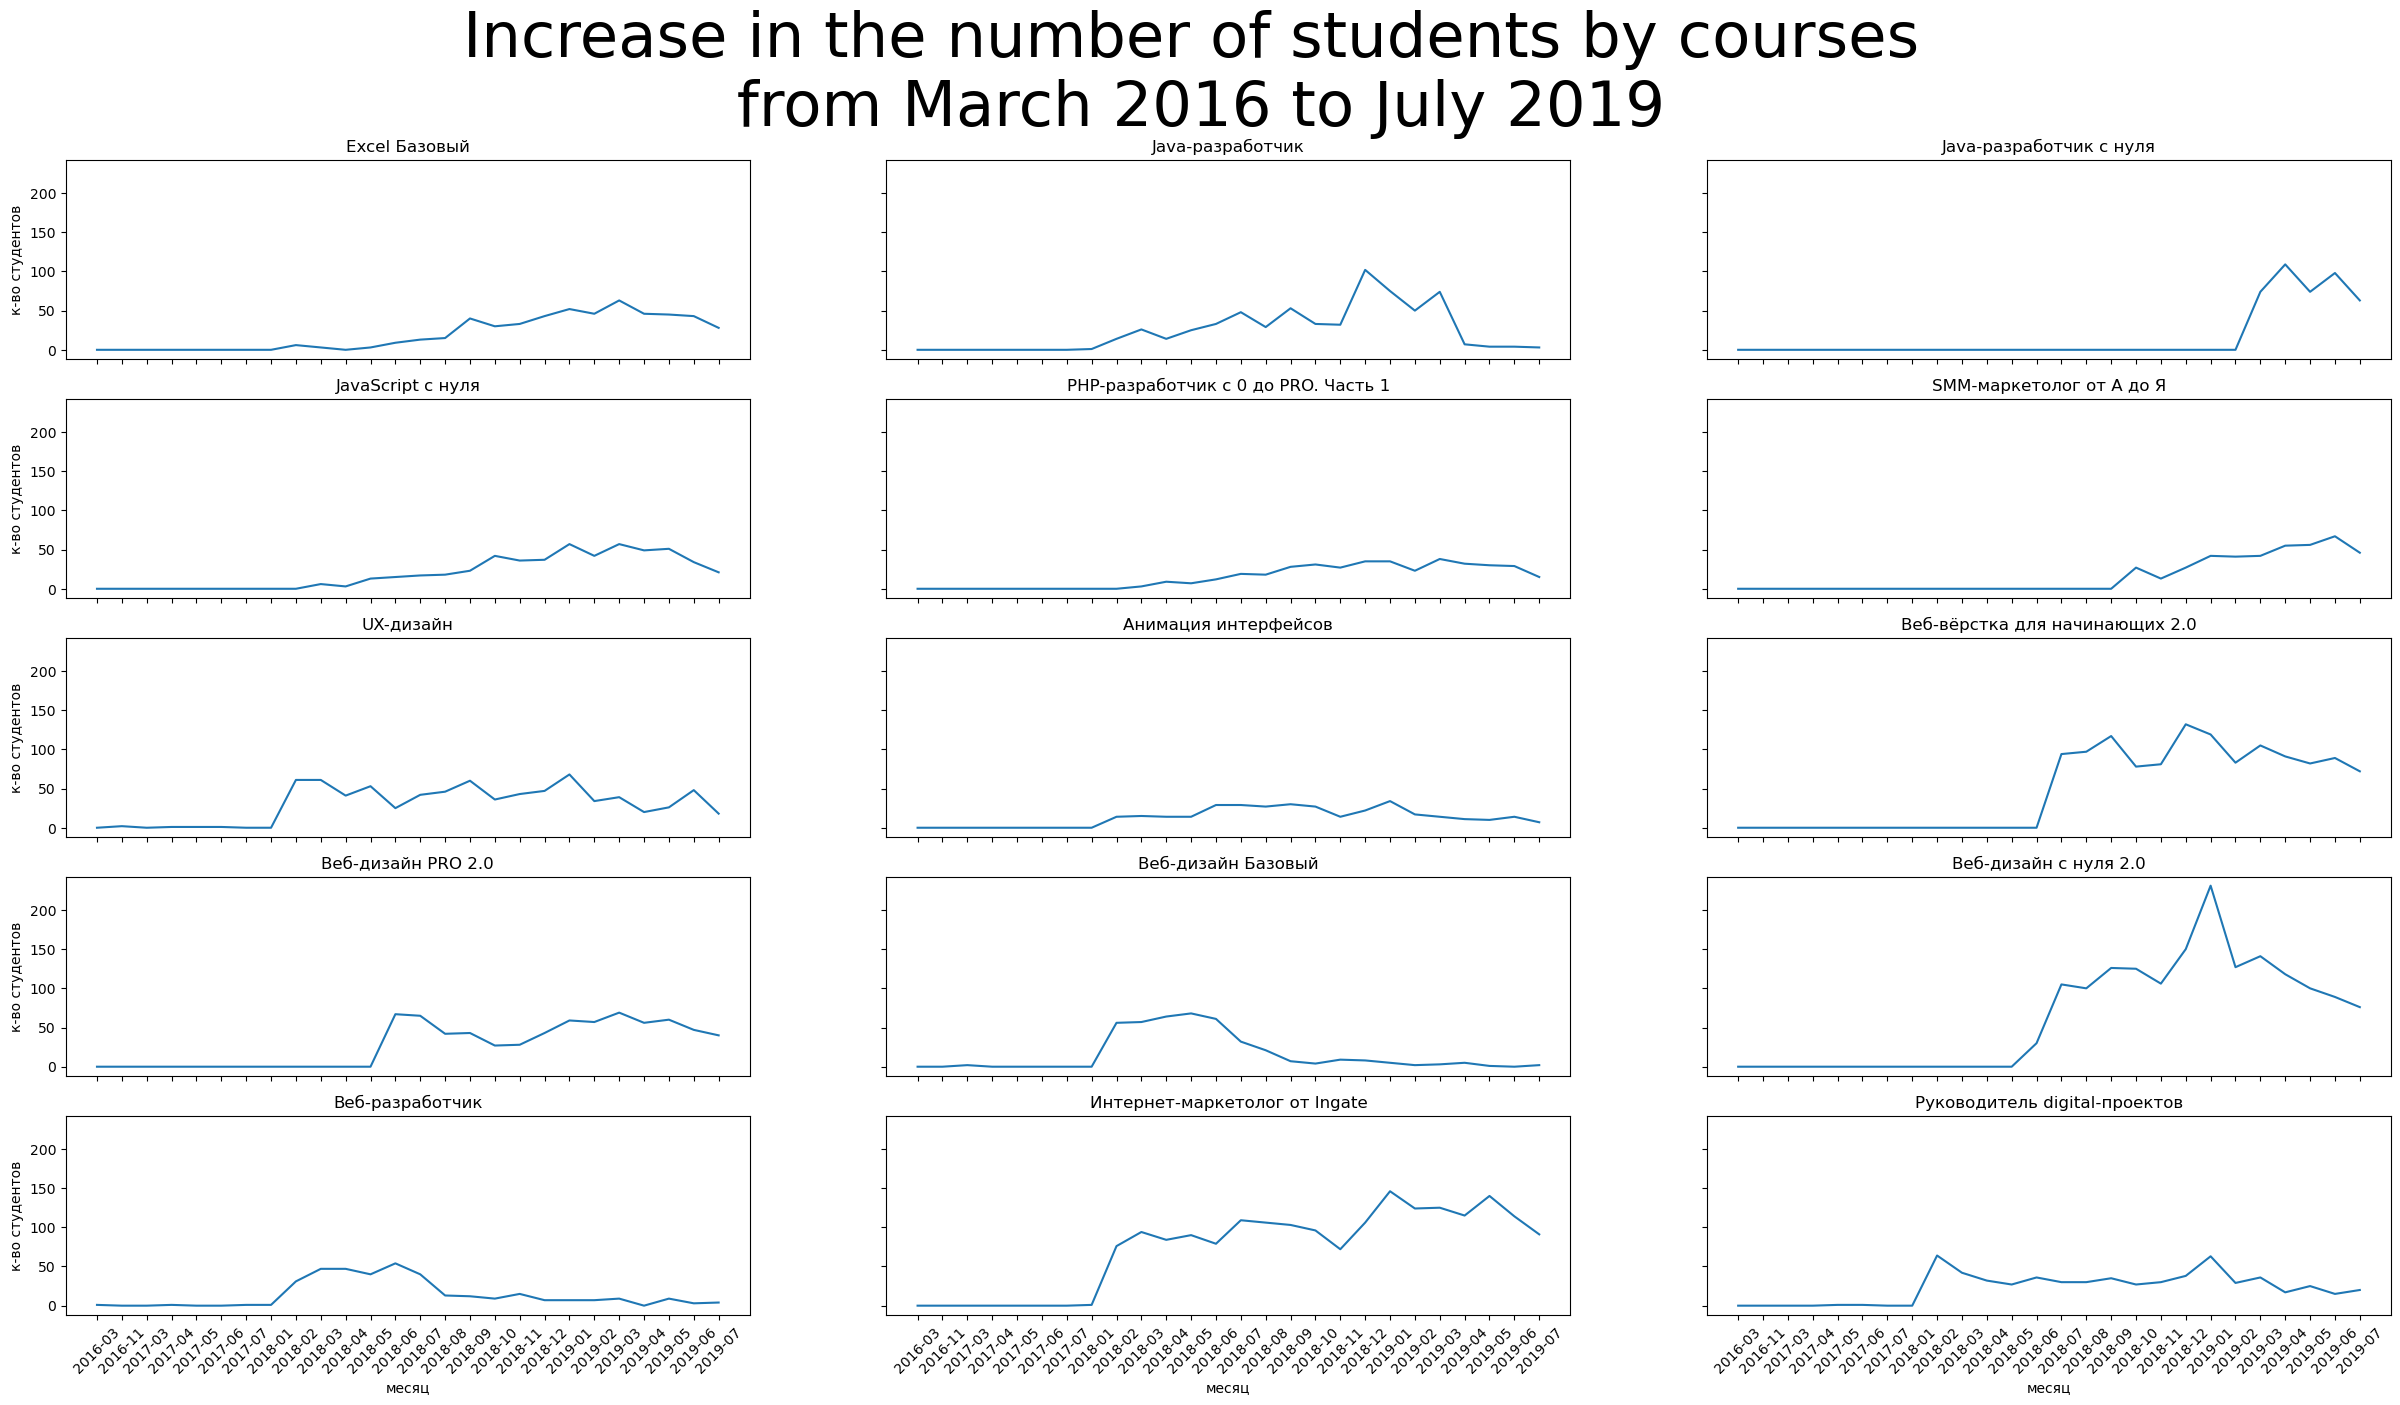

In [44]:
fig, axs = plt.subplots(nrows = 5, ncols = 3, figsize=(30,15), sharex = True, sharey = True)

for i, course in enumerate(list(df_increase.index)):
    for j,k in enumerate(list(range(3,18,3))):
        if i>(k-4) and i<k: 
            l = i%3
            data_by_course = df_increase.loc[course][:]
            ax = axs[j][l]
            sns.lineplot(ax = ax, data=data_by_course)
            ax.set_title(course)
            ax.set_xlabel('месяц')
            ax.set_ylabel('к-во студентов')
            ax.set_xticklabels(df_increase.columns, rotation=45)
            

fig.suptitle('Increase in the number of students by courses\n from March 2016 to July 2019', fontsize=45)


##### 2.3. line-graph with several lines reflecting the growth of students in each month for each course. 15 lines on the chart.

/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/2529608341.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_increase.columns, rotation=30)
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/2529608341.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_increase.columns, rotation=30)
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/2529608341.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_increase.columns, rotation=30)
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/2529608341.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_increase.columns, rotation=30)
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/2529608341.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator


Text(0.5, 0.98, 'Increase in the number of students by courses\n in from March 2016 to July 2019')

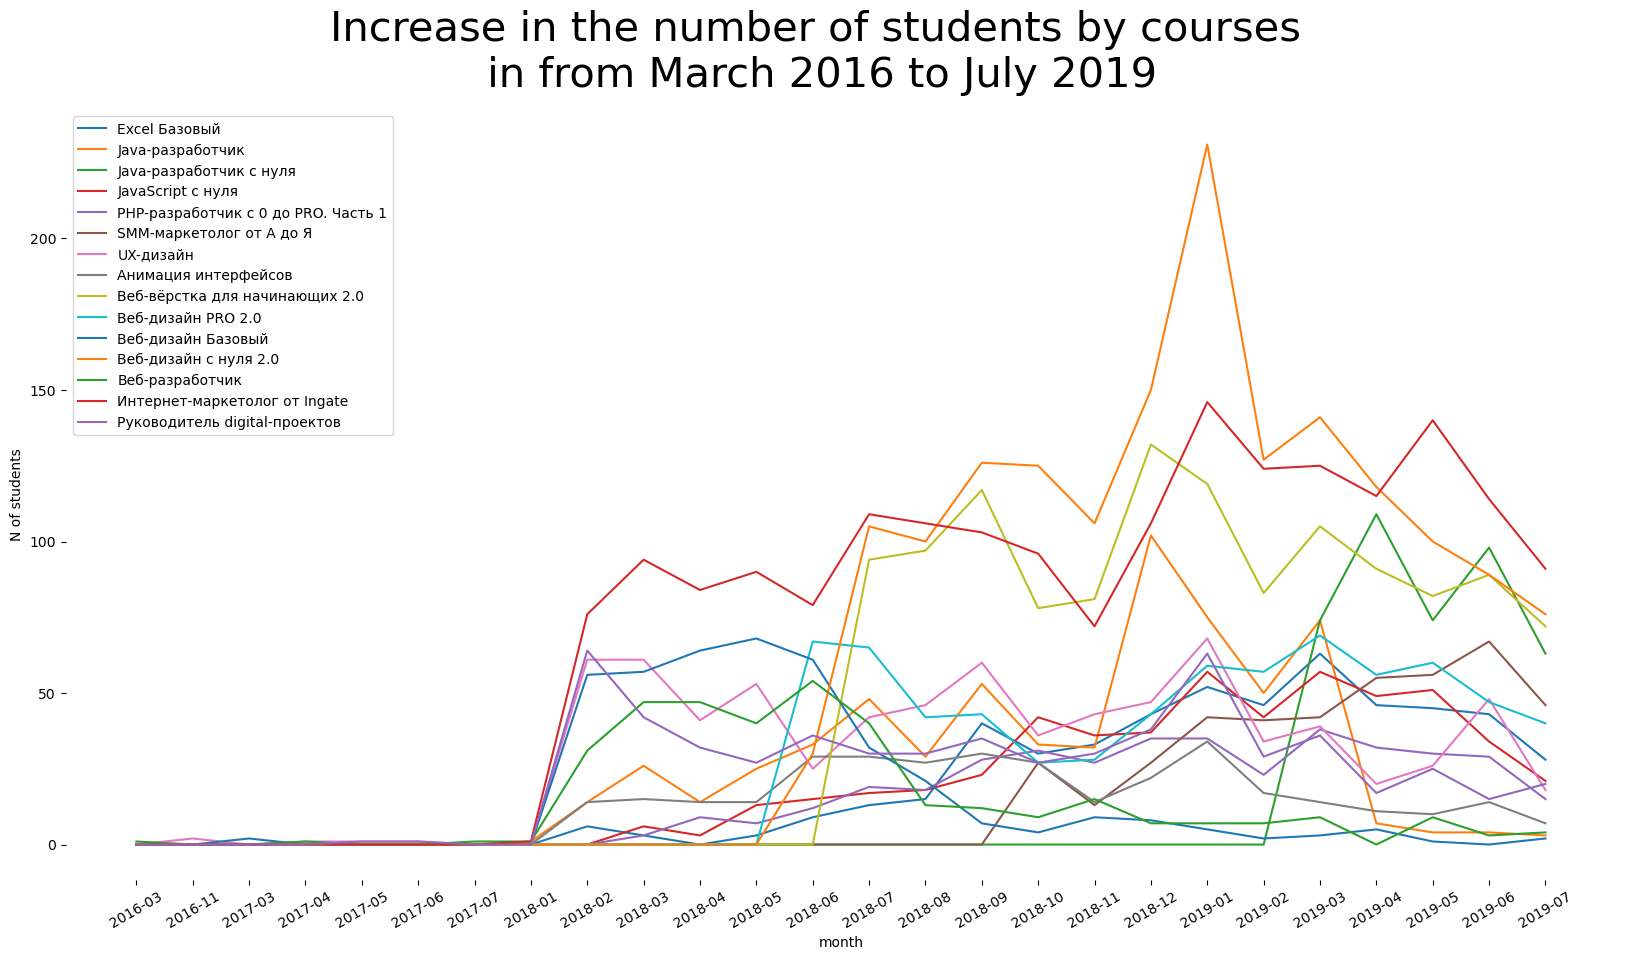

In [46]:
fig, ax = plt.subplots(figsize=(20,10))

for course in list(df_increase.index):
    data_by_course = df_increase.loc[course][:]
    sns.lineplot(data=data_by_course, label = course)
    ax.set_ylabel('N of students')
    ax.set_xlabel('month')
    ax.set_xticklabels(df_increase.columns, rotation=30)
    ax.set(facecolor = "white")
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    
fig.suptitle('Increase in the number of students by courses\n in from March 2016 to July 2019', fontsize=30)

##### 2.4. Number of homework progresses in each month throughout history (each month in the range from March 2016 to July 2019 inclusive) for each course. Take into account that completing homework can flow from one month to another (such tasks must be included in the total number of progress for all months covered by the deadline for completing these tasks)

Number of projects started and completed in one month

In [53]:
df_within_month = df_all[(df_all['start_y_m']==df_all['finish_y_m'])&(df_all['status']=='done')] 

HW is not finished yet

In [54]:
df_not_finished= df_all[(df_all['status']=='start')|(df_all['status']=='fail')|(df_all['status']=='wait')&(pd.isnull(df_all['finish_date'])==True)]

HW that is completed and started in different months

In [55]:
df_different_months = df_all[(df_all['start_y_m']!=df_all['finish_y_m'])&(df_all['status']=='done')]

#### data frame preparation for merging

In [56]:
within_month = df_within_month.groupby(['course_title','start_y_m']).student_id.count().to_frame().unstack().fillna(0)
within_month.columns = within_month.columns.droplevel()

In [57]:
not_finished = df_not_finished.groupby(['course_title','start_y_m']).student_id.count().to_frame().unstack().fillna(0)
not_finished.columns = not_finished.columns.droplevel()
not_finished_cumsum = not_finished.cumsum(axis=0)
#frame with records where the work is not finished.
#Based on the assumption that work that has begun but is not completed is carried out throughout the entire period
#until the end of the considered time interval

In [58]:
def month_reg(x,y):
    months_list = [] 
    num_months = (y.year - x.year) * 12 + (y.month - x.month)
    for i in list(range(1,(num_months+1))):
        month = (x + pd.DateOffset(months=i)).strftime('%Y-%m')
        months_list.append(str(month))
    months_list.append(x.strftime('%Y-%m'))
    return months_list

df_different_months['months_list'] = df_different_months.apply(lambda row: month_reg(row['start_date'], row['finish_date']), axis = 1)
#in a data frame with tasks started and completed in different months, create a column with lists of all months in which the task was completed.
#Let's choose the logic that something that was carried out over several months falls into each specific month of calculation.

/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/3864249749.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_different_months['months_list'] = df_different_months.apply(lambda row: month_reg(row['start_date'], row['finish_date']), axis = 1)


In [59]:
every_months_between = df_different_months.explode('months_list')
different_months = every_months_between.groupby(['course_title','months_list']).student_id.count().to_frame().unstack()
different_months.columns = different_months.columns.droplevel()
different_months = different_months.fillna(0) # final dataframe with tasks started and completed in different months

In [60]:
all_3 = within_month + not_finished_cumsum + different_months #Final dataframe with the number of progress made
all_3.fillna(0, inplace = True)    

##### 2.5. Plots

/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/3244898736.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(all_3.columns, rotation=45)
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/3244898736.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(all_3.columns, rotation=45)
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/3244898736.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(all_3.columns, rotation=45)
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/3244898736.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(all_3.columns, rotation=45)
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/3244898736.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabel

Text(0.5, 0.98, 'Number of progress made on homework in each month')

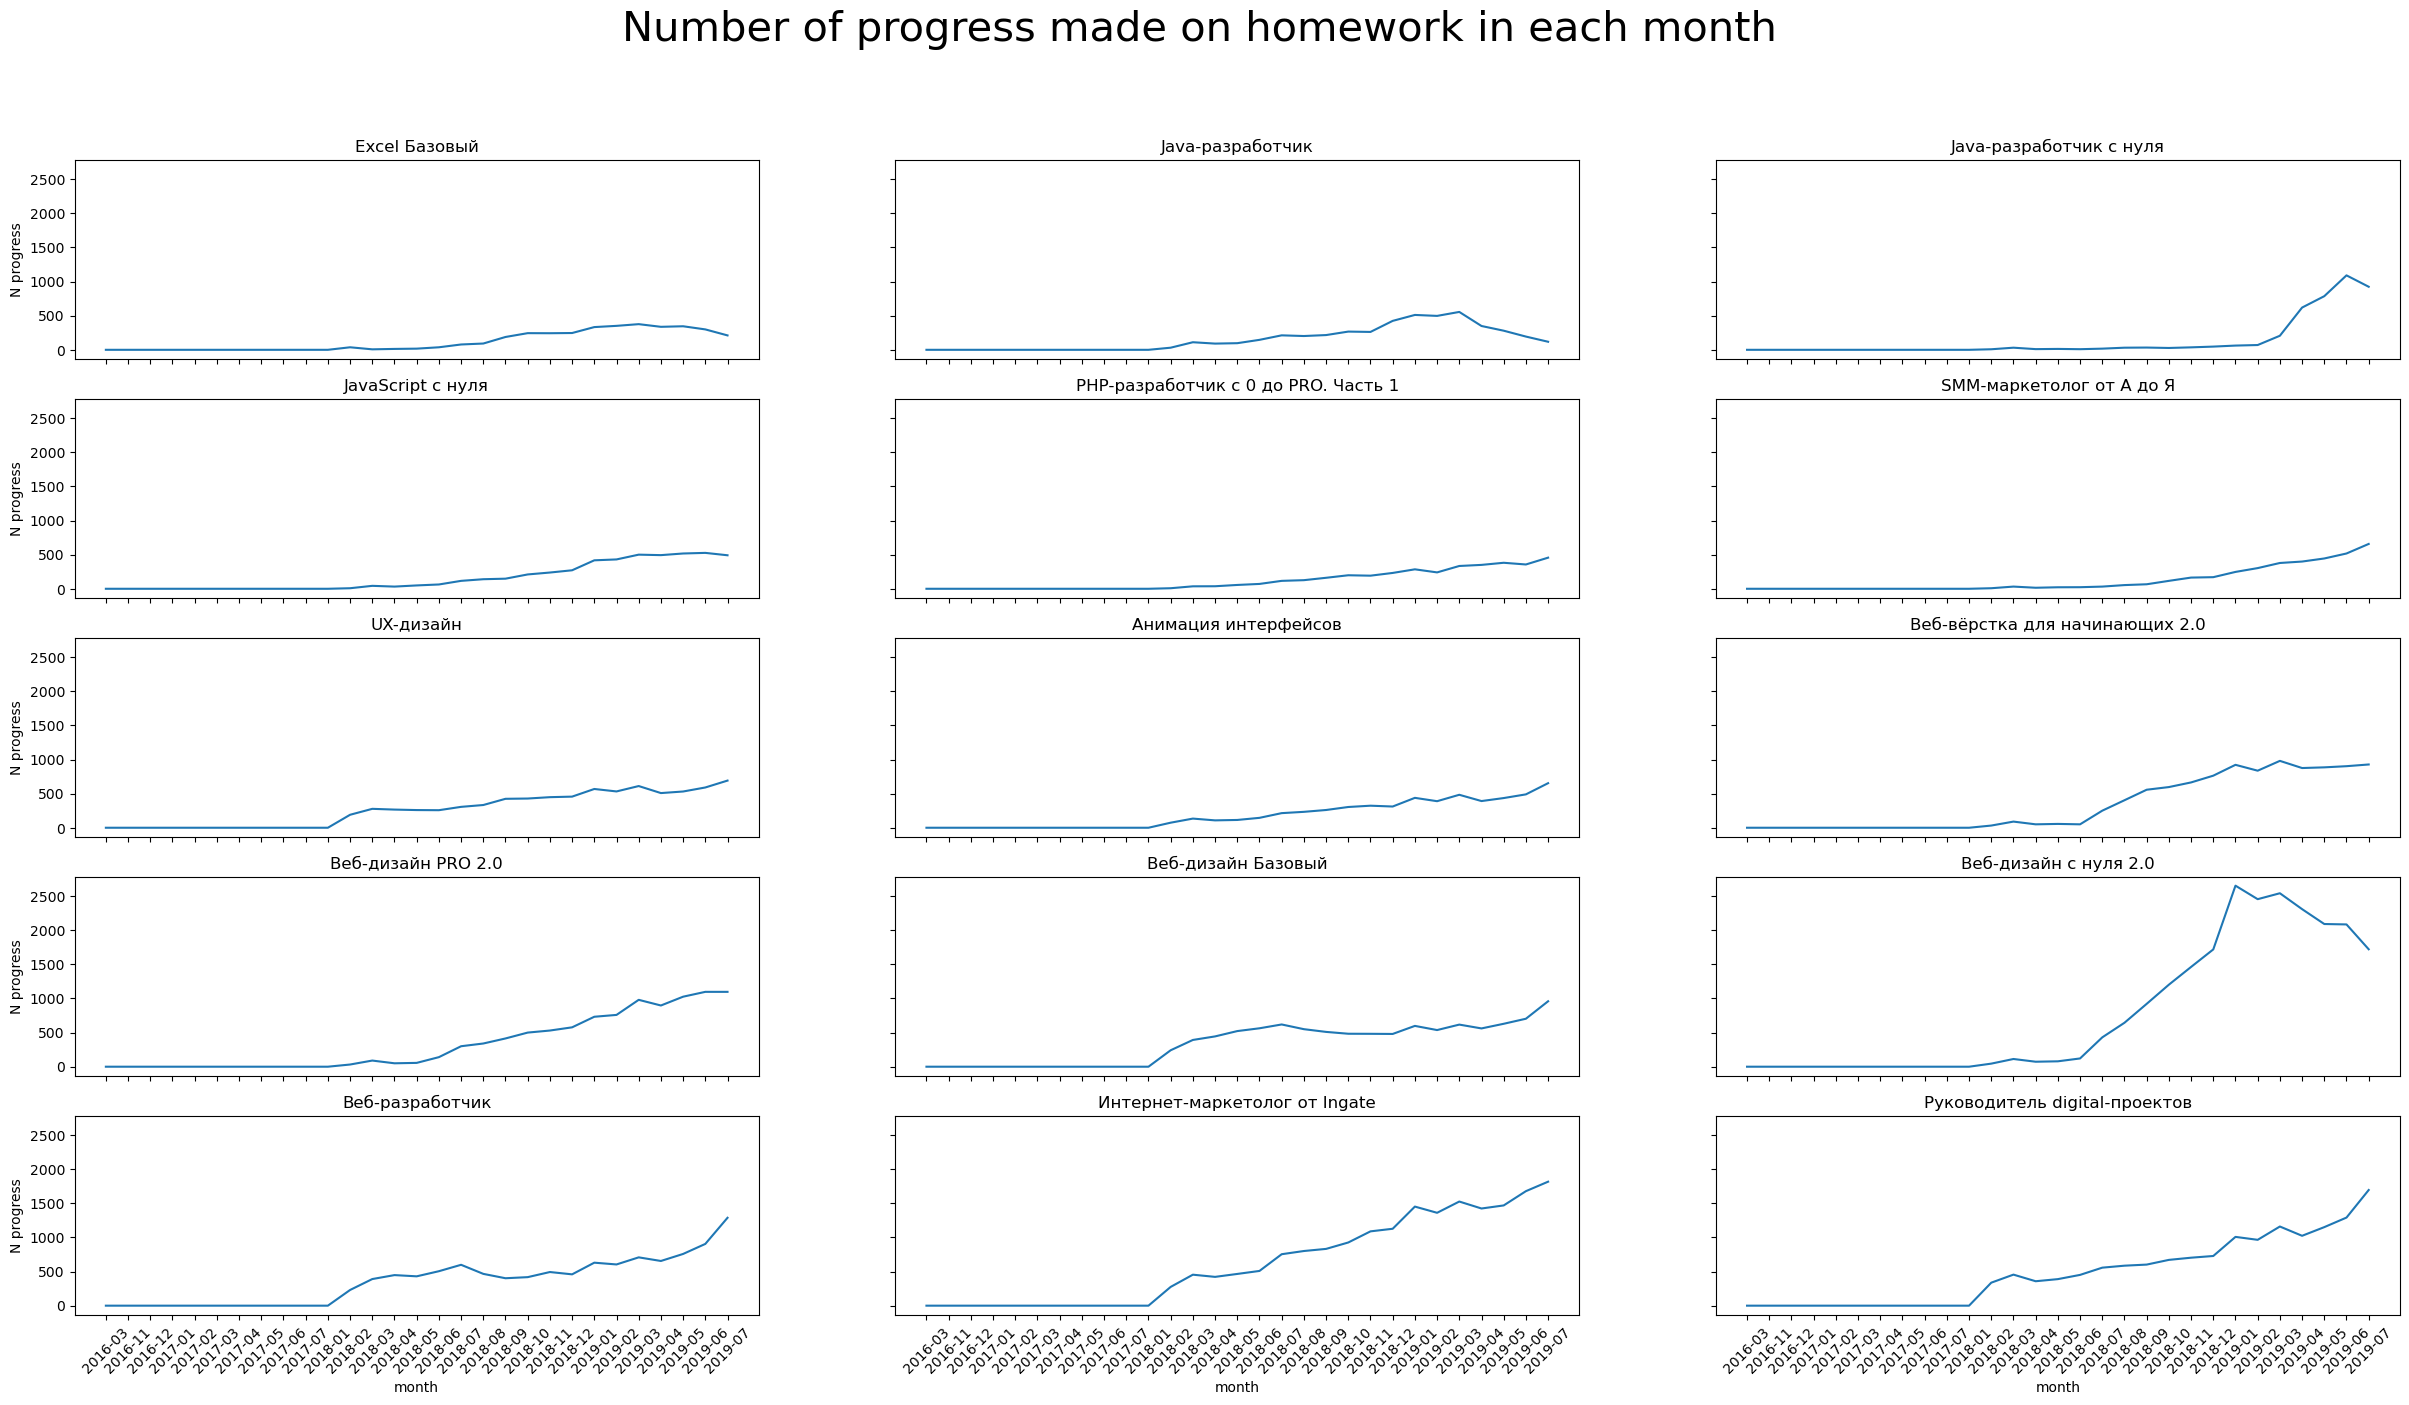

In [67]:
fig, axs = plt.subplots(nrows = 5, ncols = 3, figsize=(30,15), sharex = True, sharey = True)

for i, course in enumerate(list(all_3.index)):
    for j,k in enumerate(list(range(3,18,3))):
        if i>(k-4) and i<k: 
            l = i%3
            data_by_course = all_3.loc[course][:]
            ax = axs[j][l]
            sns.lineplot(ax = ax, data=data_by_course)
            ax.set_title(course)
            ax.set_xlabel('month')
            ax.set_ylabel('N progress')
            ax.set_xticklabels(all_3.columns, rotation=45)
            

fig.suptitle('Number of progress made on homework in each month', fontsize=30)

##### 2.6. All in one plot 

/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/3877697473.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(all_3.columns, rotation=30)
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/3877697473.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(all_3.columns, rotation=30)
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/3877697473.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(all_3.columns, rotation=30)
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/3877697473.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(all_3.columns, rotation=30)
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/3877697473.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(all

Text(0.5, 0.98, 'Number of progress made on homework in each month')

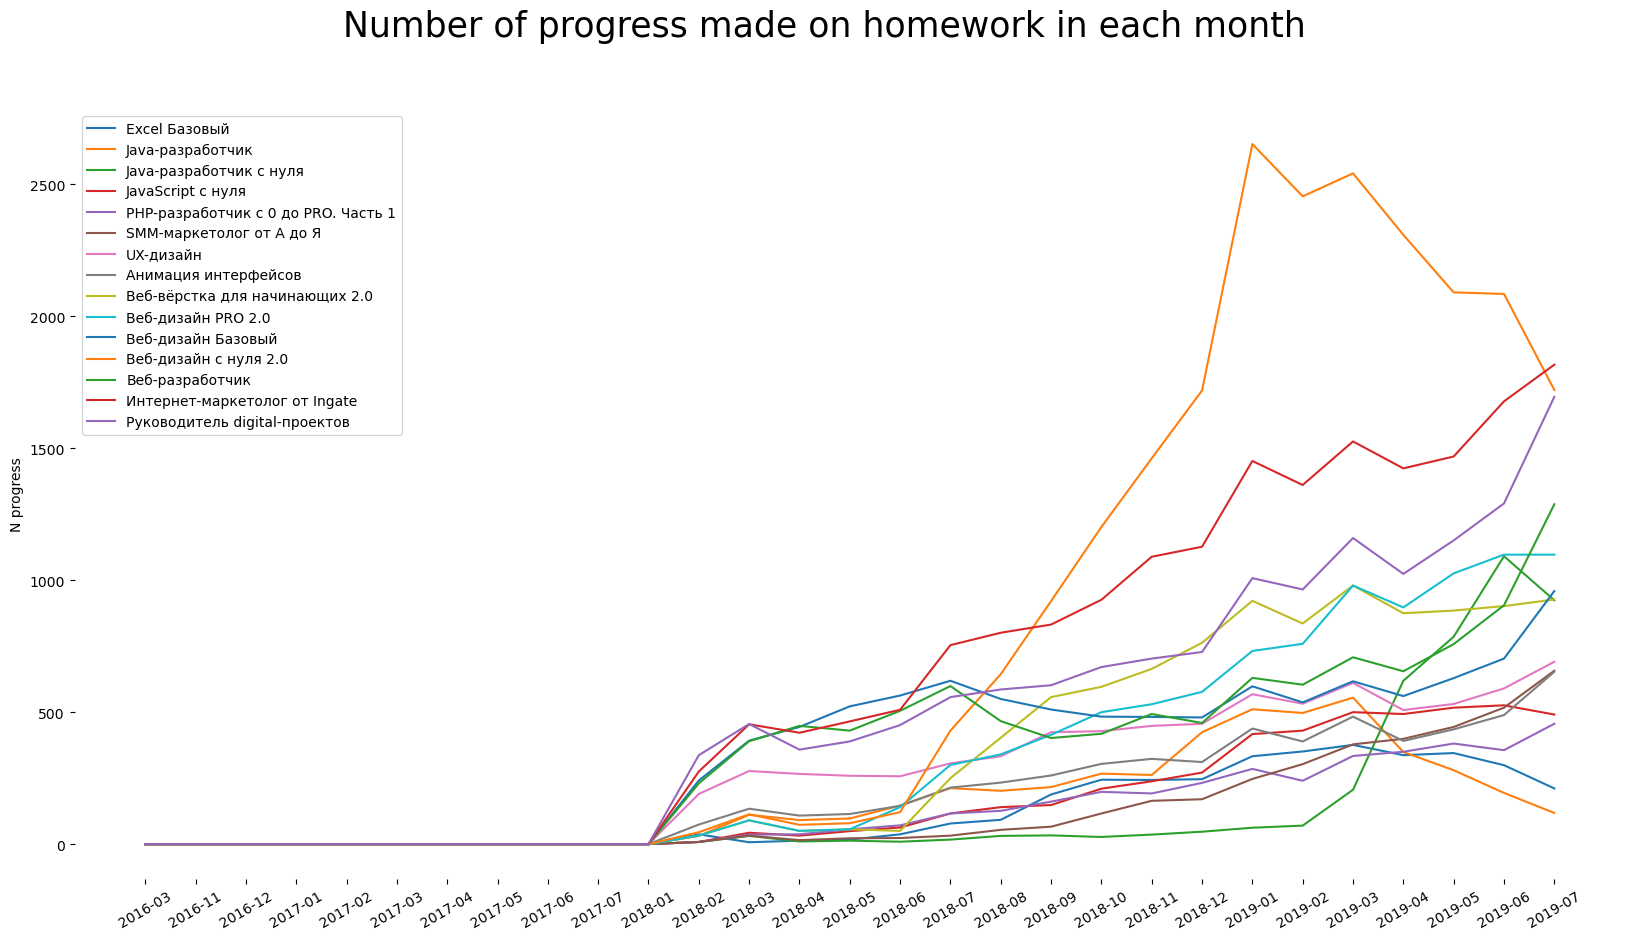

In [68]:
fig, ax = plt.subplots(figsize=(20,10))

for course in list(all_3.index):
    data_by_course = all_3.loc[course][:]
    sns.lineplot(data=data_by_course, label = course)
    ax.set_ylabel('N progress')
    ax.set_xticklabels(all_3.columns, rotation=30)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    ax.set(facecolor = "white")

fig.suptitle('Number of progress made on homework in each month', fontsize=25)

##### 2.7. Conclusion

# Conclusions from the analysis of data on student growth:
- All trends on the charts begin, in principle, from the beginning of 2018. Most likely, this date (+- January 2018) is the actual date of the beginning of the interval for considering changes in the increase in the number of students on courses.
- Based on the increase in students, we can conclude:
     - popularity of the specialty in general (Y value):
         - it is obvious that the absolute value of the increase in students in a particular specialty over the observed months, or the average “height of the graph,” indicates the popularity of a particular course. As in the previous series of findings, we see that the most popular specialties are:
            - Веб-дизайн с нуля 2.0 
            - Веб-дизайн PRO 2.0 
            - Веб-вёрстка для начинающих 2.0 
            - Интернет-маркетолог от Ingate
     - whether a particular course is gaining popularity among students. Or at least whether it is losing popularity (the height of the graph is no less after a period). You can also identify those courses that for some reason are losing popularity;
         - Gaining popularity:
            - JavaScript с нуля
            - Excel Базовый
            - Java-разработчик
            - PHP-разработчик с 0 до PRO. Часть 1
            - SMM-маркетолог от А до Я
            - Анимация интерфейсов
            - Интернет-маркетолог от Ingate 
         - Remaining popular:
            - UX-дизайн
            - Веб-вёрстка для начинающих 2.0
            - Веб-дизайн PRO 2.0
            - Руководитель digital-проектов
         - Losing popularity:
            - Веб-разработчик
            - Веб-дизайн Базовый
     - whether the start date of training is seasonal (this will directly help marketers develop advertising strategies based on time;
- Basically, all specialties are subject to seasonal growth of new students. And mostly this is January, that is, the New Year holiday season. This can be both a consequence of advertising strategies deployed on the eve of the holidays, and a factor in the behavior of buyers who, summing up the results of the year, take a step towards changing the type of their activity.

# Conclusions from the analysis of data on changes in the number of progress

- The number of progress in all specialties grows evenly over time. It falls only in those specialties where the influx of new students has stopped. Accordingly, the amount of progress at a specific point in time is associated with the number of newly arrived students. These are all logical conclusions. Accordingly, it is possible to plan and prepare teaching capacities to support training based on the volume of the flow of new students.
- The systematic growth in the graphs is explained by the fact that in a particular month, a student who entered the course that month and a student continuing their studies submit homework at the same time. In other words, the growth of the graph is caused by the cumulative effect of testing students' knowledge.

# III. Identifying problematic modules

##### 3.1. Calculate the minimum, maximum, average, median time for completing each module

### Task 

1. **(p)** Calculate the minimum, maximum, average, median time for completing each module (the difference between the start and end times of homework) for each course. If there are several homework assignments in a module, then calculate the difference between the start time of the first homework and the end time of the last homework in the module
2. **(m)** Based on the first point, construct a line-graph with the median time to complete each module for each course. 15 charts. Graphs must have titles
3. **(p)** To identify seasonality, calculate the median homework time by month (12 months, January-December) for each course.
4. **(m)** Based on the third point, construct a line-graph on which lines will be drawn for each course with the median time for completing homework by month. 15 lines on the chart. The graph must have a title. The axis reflecting the travel time must be labeled. The line for each course must have its own color (a legend is needed). The schedule should not have any frames 
5. Based on the calculated values, draw an analytical conclusion (must be complete and cover all the metrics obtained above)

In [70]:
time = df_c[(df_c['is_homework']==True)&(df_c['status']=='done')] # data for this analysis

In [71]:
time_extr = time.groupby(['course_title','module_number','student_id']).\
            agg({'start_date': np.min, 'finish_date': np.max}).reset_index() # start and end dates for the student completing the module

In [72]:
time_extr['time_expenditure'] = time_extr['finish_date'] - time_extr['start_date']# column of time spent on completing the module

In [73]:
time_exp = time_extr.groupby(['course_title','module_number'])['time_expenditure'].min().to_frame() 
time_exp # something strange!

time_expenditure
course_title                  module_number                         
Excel Базовый                 1             -1 days +23:59:59.999725
                              2             -1 days +23:59:59.999707
                              3             -1 days +23:59:59.999765
                              4             -1 days +23:59:59.999748
                              5             -1 days +23:59:59.999683
...                                                              ...
Руководитель digital-проектов 12            -1 days +23:59:59.999647
                              13            -1 days +23:59:59.999710
                              14            -1 days +23:59:59.999688
                              15            -1 days +23:59:59.999643
                              16            -1 days +23:59:59.999533

[190 rows x 1 columns]

- Notice that there are many records where the start_date and finish_date are the same.
- Clear entries where the beginning and end coincide

In [74]:
time_extr_to_erase = time_extr[(time_extr['start_date'].dt.day==time_extr['finish_date'].dt.day) & \
   (time_extr['start_date'].dt.month==time_extr['finish_date'].dt.month) & \
   (time_extr['start_date'].dt.year==time_extr['finish_date'].dt.year) & \
   (time_extr['start_date'].dt.hour==time_extr['finish_date'].dt.hour) & \
   ((time_extr['start_date'].dt.minute==time_extr['finish_date'].dt.minute))] #frame-with unnecessary data

In [75]:
time_extr.drop(time_extr_to_erase.index, inplace = True) #data cleaning

revise again

In [76]:
time_extr['time_expenditure'] = time_extr['time_expenditure'].values.astype(np.int64) #transform data to calculate average

In [77]:
time_exp_mmm = time_extr.groupby(['course_title','module_number']).agg({'time_expenditure': [np.min, np.max, np.mean]})
time_exp_mmm.columns = time_exp_mmm.columns.droplevel(0)

In [78]:
time_exp_mmm['amin'] = pd.to_timedelta(time_exp_mmm['amin'])
time_exp_mmm['amax'] = pd.to_timedelta(time_exp_mmm['amax'])
time_exp_mmm['mean'] = pd.to_timedelta(time_exp_mmm['mean']) 
#reverse data conversion

In [79]:
time_exp_mean = time_exp_mmm['mean'].to_frame()

Preparing data for plotting:

In [80]:
time_exp_mean['mean'] = round((time_exp_mean['mean'] / np.timedelta64(1,'D')),2)
time_exp_mean = time_exp_mean.reset_index().groupby(['course_title','module_number'])['mean'].sum().to_frame().unstack()
time_exp_mean.columns = time_exp_mean.columns.droplevel() 
time_exp_mean

module_number,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
course_title,,,,,,,,,,,,,,,,,,,,,
Excel Базовый,6.04,4.35,3.45,11.04,7.45,5.17,10.18,9.74,18.61,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Java-разработчик,9.88,17.94,23.99,20.02,20.82,13.20,10.82,21.10,32.49,10.93,...,31.27,32.65,17.14,15.02,NaN,40.90,NaN,NaN,NaN,NaN
Java-разработчик c нуля,9.73,8.02,11.04,15.98,15.01,13.53,7.36,13.63,7.94,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JavaScript с нуля,12.80,19.37,10.99,13.71,17.57,16.47,20.88,14.57,14.27,11.66,...,7.50,5.51,11.79,17.95,23.06,NaN,45.65,NaN,NaN,NaN
PHP-разработчик с 0 до PRO. Часть 1,8.47,30.43,25.23,32.43,33.06,26.14,51.92,98.22,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMM-маркетолог от А до Я,14.84,18.49,17.20,8.54,7.12,19.62,NaN,13.90,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UX-дизайн,19.17,14.67,18.67,29.14,NaN,23.43,29.25,NaN,78.62,NaN,...,NaN,86.24,NaN,NaN,NaN,NaN,NaN,18.30,20.92,NaN
Анимация интерфейсов,11.86,16.51,34.02,18.10,17.21,NaN,24.04,31.14,NaN,13.71,...,NaN,25.57,24.48,32.37,NaN,NaN,31.29,NaN,NaN,41.29
Веб-вёрстка для начинающих 2.0,10.53,14.31,32.71,32.34,37.83,28.62,24.38,31.24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 3.2. line-graph with median completion time for each module for each course.

/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/863816259.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(time_exp_mean.columns)
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/863816259.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(time_exp_mean.columns)
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/863816259.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(time_exp_mean.columns)
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/863816259.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(time_exp_mean.columns)
/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/863816259.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(time_exp_mean.columns)


Text(0.5, 0.98, 'Median time to complete each module for each course')

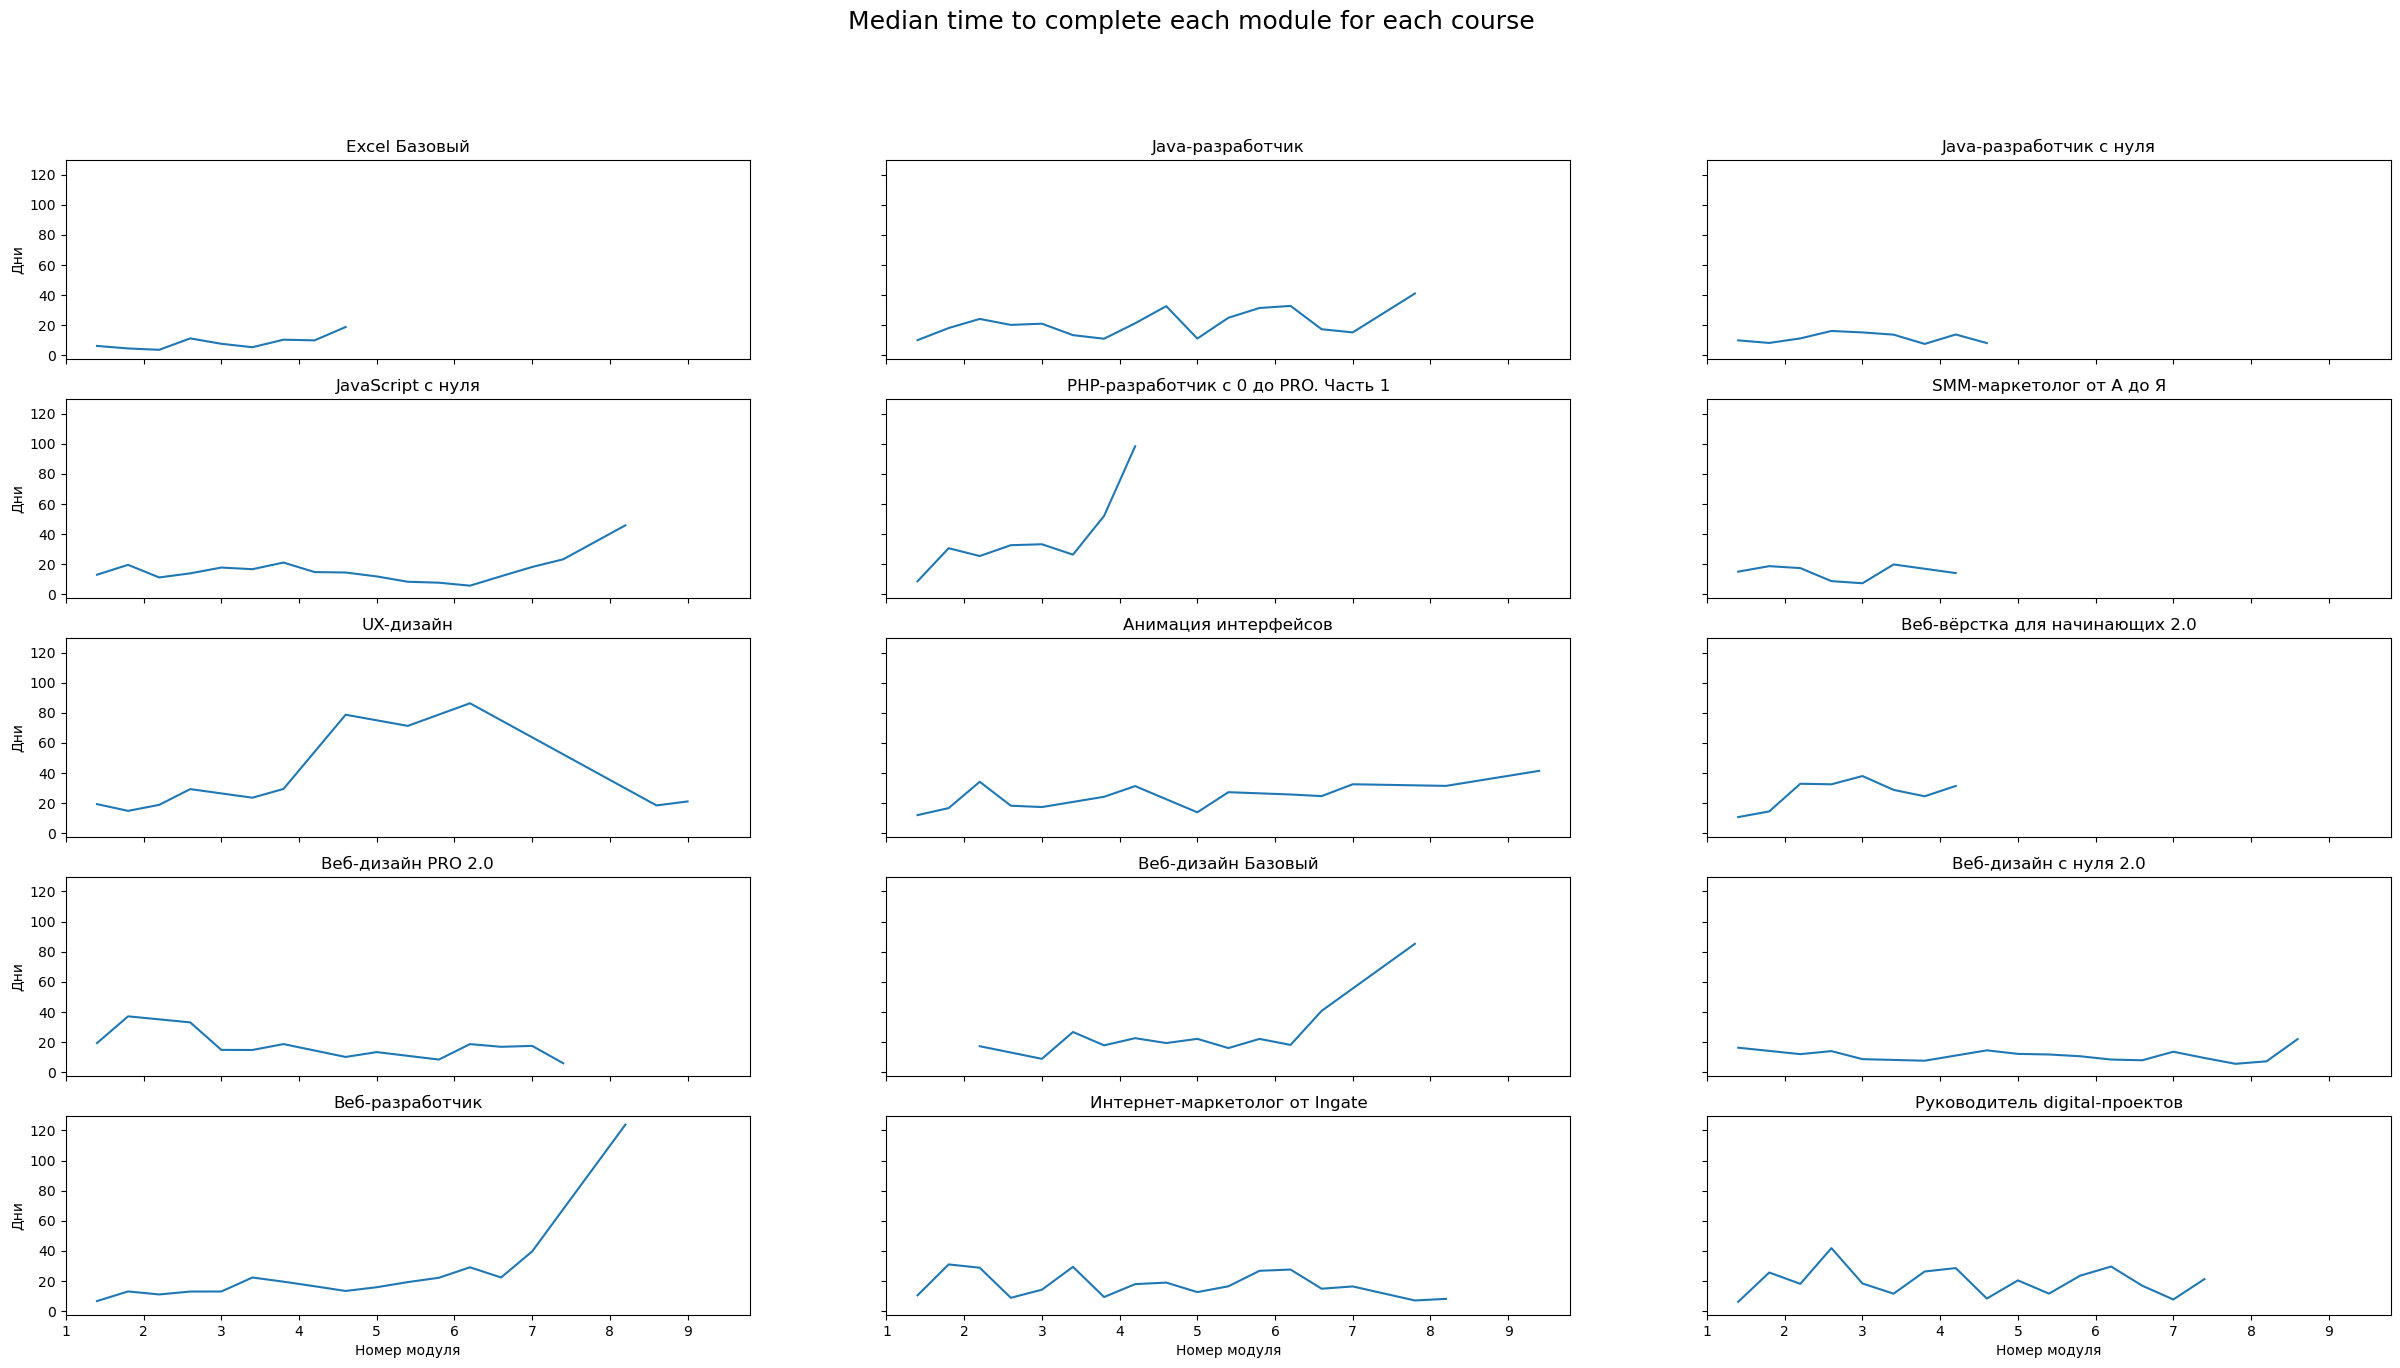

In [82]:
fig, axs = plt.subplots(nrows = 5, ncols = 3, figsize=(30,15), sharex = True, sharey = True)

for i, course in enumerate(list(all_3.index)):
    for j,k in enumerate(list(range(3,18,3))):
        if i>(k-4) and i<k: 
            l = i%3
            data_by_course = time_exp_mean.loc[course][:]
            ax = axs[j][l]
            sns.lineplot(ax = ax, data=data_by_course)
            ax.set_title(course)
            ax.set_xlabel('Номер модуля')
            ax.set_ylabel('Дни')
            ax.set_xticklabels(time_exp_mean.columns)
            

fig.suptitle('Median time to complete each module for each course', fontsize=18)

##### 3.3. To identify seasonality, calculate the median homework completion time by month (12 months, January-December) for each course.

In [83]:
#Grouping the data:
mean_time_by_month = time.groupby(['course_title','student_id','lesson_number'])\
                    .agg({'start_date': np.min, 'finish_date': np.max}).reset_index()
mean_time_by_month['time_expenditure'] = mean_time_by_month['finish_date'] - mean_time_by_month['start_date']
mean_time_by_month['time_expenditure'] = round((mean_time_by_month.time_expenditure / np.timedelta64(1,'D')),2)

In [84]:
mean_time_by_month['start_month'] = mean_time_by_month['start_date'].dt.month #вынесем значение месяца начала в отделный столбец

In [85]:
mean_time_by_month

,course_title,student_id,lesson_number,start_date,finish_date,time_expenditure,start_month
0,Excel Базовый,001b192f899a84496be98b41906246fc,11,2019-03-29 20:43:08.914029+00:00,2019-03-31 07:19:02.064532+00:00,1.44,3
1,Excel Базовый,006f0189ec657741ee4d53474c7a258d,3,2019-02-08 04:58:29.545635+00:00,2019-02-12 21:59:57.927827+00:00,4.71,2
2,Excel Базовый,006f0189ec657741ee4d53474c7a258d,5,2019-02-21 04:25:12.661812+00:00,2019-03-10 23:47:06.527886+00:00,17.81,2
3,Excel Базовый,006f0189ec657741ee4d53474c7a258d,7,2019-02-04 05:06:38.922649+00:00,2019-02-20 16:31:09.326611+00:00,16.48,2
4,Excel Базовый,006f0189ec657741ee4d53474c7a258d,11,2019-01-25 03:25:26.690241+00:00,2019-01-26 09:52:36.422160+00:00,1.27,1
...,...,...,...,...,...,...,...
26672,Руководитель digital-проектов,ff7f326a0547ac061779ea5685aec73b,3,2019-05-30 10:30:50.915822+00:00,2019-06-14 03:05:15.149756+00:00,14.69,5
26673,Руководитель digital-проектов,ff7f326a0547ac061779ea5685aec73b,4,2019-01-10 11:47:44.928887+00:00,2019-06-13 07:34:34.255830+00:00,153.82,1
26674,Руководитель digital-проектов,ff7f326a0547ac061779ea5685aec73b,5,2019-06-13 10:32:08.136391+00:00,2019-06-14 03:23:00.263864+00:00,0.70,6
26675,Руководитель digital-проектов,ff7f326a0547ac061779ea5685aec73b,6,2019-06-17 13:47:01.538149+00:00,2019-06-20 03:55:54.958365+00:00,2.59,6


In [87]:
mean_time_by_month_grouped = mean_time_by_month.groupby(['start_month','course_title']).agg({'time_expenditure': np.mean})
mean_time_by_month_grouped['time_expenditure'] = mean_time_by_month_grouped['time_expenditure'].apply(lambda x: round(x))

In [88]:
mean_time_by_month_grouped #average time spent on completing the course, grouped by month students started completing the task
#If a specific record did not have an end date, it was executed all months from the start date to the end date of the observation time period

time_expenditure
start_month course_title                                         
1           Excel Базовый                                      14
            Java-разработчик                                   35
            JavaScript с нуля                                  38
            PHP-разработчик с 0 до PRO. Часть 1                25
            SMM-маркетолог от А до Я                           31
...                                                           ...
12          Веб-дизайн Базовый                                 57
            Веб-дизайн с нуля 2.0                              51
            Веб-разработчик                                   118
            Интернет-маркетолог от Ingate                      23
            Руководитель digital-проектов                      47

[171 rows x 1 columns]

In [89]:
plot_table = mean_time_by_month_grouped.reset_index().groupby(['course_title','start_month'])['time_expenditure']\
                .sum().to_frame().unstack() 
plot_table.columns = plot_table.columns.droplevel() 
plot_table #dataframe for plotting

start_month,1,2,3,4,5,6,7,8,9,10,11,12
course_title,,,,,,,,,,,,
Excel Базовый,14.0,15.0,16.0,14.0,11.0,6.0,10.0,24.0,13.0,13.0,17.0,19.0
Java-разработчик,35.0,37.0,35.0,29.0,44.0,53.0,48.0,67.0,57.0,63.0,48.0,37.0
Java-разработчик c нуля,NaN,NaN,42.0,23.0,17.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN
JavaScript с нуля,38.0,26.0,26.0,25.0,24.0,22.0,37.0,55.0,72.0,54.0,48.0,49.0
PHP-разработчик с 0 до PRO. Часть 1,25.0,28.0,17.0,21.0,18.0,20.0,30.0,25.0,33.0,48.0,43.0,33.0
SMM-маркетолог от А до Я,31.0,27.0,30.0,24.0,21.0,13.0,5.0,NaN,NaN,48.0,51.0,49.0
UX-дизайн,40.0,38.0,52.0,53.0,39.0,39.0,42.0,56.0,71.0,58.0,60.0,49.0
Анимация интерфейсов,38.0,54.0,87.0,92.0,65.0,49.0,82.0,81.0,88.0,75.0,57.0,40.0
Веб-вёрстка для начинающих 2.0,39.0,30.0,27.0,22.0,16.0,12.0,32.0,56.0,53.0,54.0,44.0,41.0


##### 4. line-graph

Text(0.5, 0.98, 'Number of progress made on homework in each month')

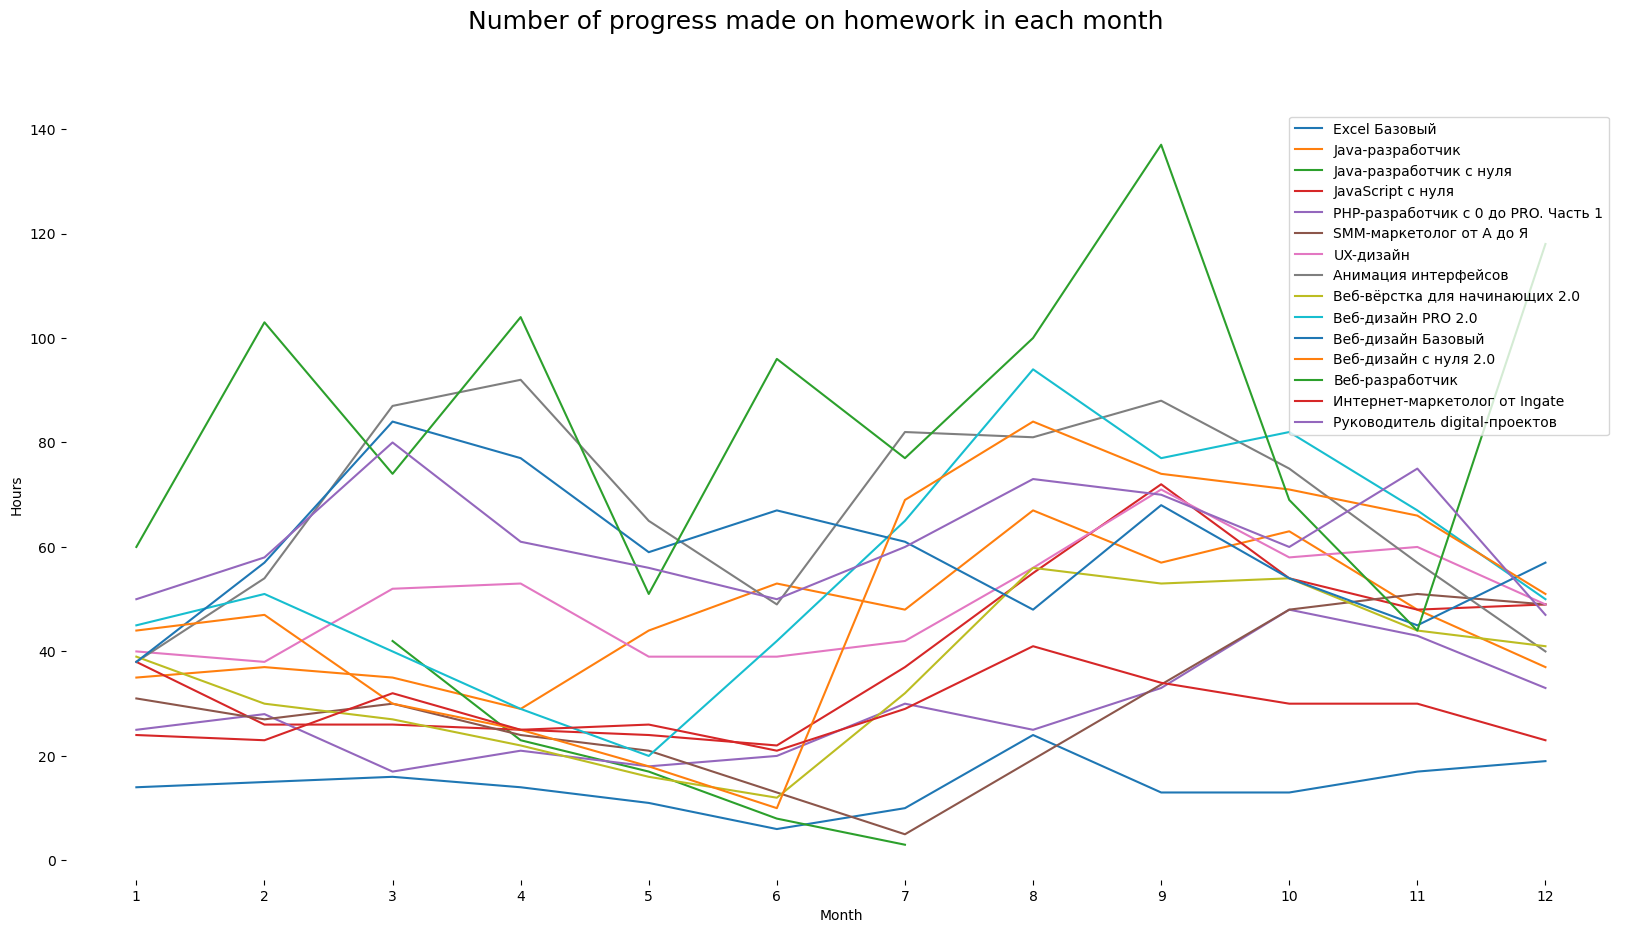

In [92]:
fig, ax = plt.subplots(figsize=(20,10))

for course in list(plot_table.index):
    data_by_course = plot_table.loc[course][:]
    sns.lineplot(data=data_by_course, label = course)
    ax.set_ylabel('Hours')
    ax.set_xlabel('Month')
    ax.set_xticks(plot_table.columns)
    ax.set(facecolor = "white")
    
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

fig.suptitle('Number of progress made on homework in each month', fontsize=18)

##### 3.5. Conclusions:

- Depending on the module number and the time it takes to complete it, in 8 courses out of 15, you can see the following relationship: the higher the module number, the longer it takes to complete the assignment;
- The “Web Design PRO 2.0” course is the only course where the relationship is reversed. The higher the module number, the shorter its execution time
- In other courses, on average, students spend the same amount of time during their studies.
- Peaks in the graphs of the amount of progress in completing tasks occur in August, September and February, March. During these months, it is necessary to prepare appropriate teaching capacities to accompany students' learning in the courses.
- You can also make the assumption that, since the larger the module number, the longer it takes to execute, and if the model takes longer to execute, then the number of iterations of submission for verification dz. (or other requests to teachers with clarifying questions) more. Accordingly, with an average course completion time of 22.5 and an average number of modules per course of 15, the number of days in a month is 30, 22.5 * 15 / 30 = 11.25 months. That is, on average, by the 12th month from the start of the course, the load on teachers will be maximum + the load increases due to the “new blood” flowing in just at the beginning of the year. Accordingly, around the New Year + - month, the number of teachers providing support for students should be appropriate

In [93]:
time_exp_mean.mean().mean() #average time to complete a module

22.46482646718361

In [94]:
df_mod_q_vs_lesson_q_mean.module_number.mean() #average number of modules per course

15.266666666666667

## IV. Conversion calculation

### Task 

1. **(p)** Calculate the conversion rate of students moving from one module to another in each course. Formula: the ratio of the number of students who started homework in this module (if there are several assignments in the module, then count according to the first assignment in the module), to the number of students who passed the assignment in the previous module (if there are several assignments in the module, then count according to the last dz in the module).
2. **(m)** Construct a bar-chart reflecting the conversion rate of students moving from one module to another in each course. The graph must have a title. Ticks need to be expanded so that they are readable
3. **(m)** Construct a horizontal (columns should be positioned horizontally) bar-chart reflecting the conversion of students from one module to another in each course. 15 charts. Graphs must have titles. Ticks must contain the module number and name. The color of the graph columns should contain information about the area to which the course belongs (a legend is needed). Transparency should be at 0.1. The graphs should include a median conversion line for each course. The median must have its own color. Graphs should not have frames 
4. Based on the calculated values, make an analytical conclusion (must be complete and cover all the metrics obtained above)

##### 4.1. Conversion of students' transition from one module to another in each course.

##### Hypotheses
- A student who has completed a module - a student who has completed the last task in the module
- A student who starts a module is a student who has any status according to the first task in the module.

In [95]:
df_cv = df_c[df_c['is_homework']==True]
#df_c - copy of df_merged 

In [96]:
first_last_hw = df_cv.groupby(['course_title', 'module_number']).agg({'lesson_number': [np.min, np.max]})
first_last_hw.columns = first_last_hw.columns.droplevel()
first_last_hw = first_last_hw.reset_index()
first_last_hw.rename(columns={'amin':'first_hw', 'amax':'last_hw'}, inplace = True)

In [97]:
df_for_filter = df_cv.merge(first_last_hw, how = 'left', right_on = ['course_title','module_number'], left_on = ['course_title','module_number'])

In [98]:
df_started = df_for_filter[df_for_filter['lesson_number']==df_for_filter['first_hw']].groupby(['course_title', 'field', 'module_number', 'module_title']).student_id.count().reset_index()

In [99]:
df_finished = df_for_filter[(df_for_filter['lesson_number']==df_for_filter['last_hw'])&(df_for_filter['status']=='done')].groupby(['course_title', 'field', 'module_number', 'module_title']).student_id.count().reset_index()

In [100]:
df_sf = df_started.merge(df_finished,  how = 'outer', left_on = ['course_title', 'field', 'module_number', 'module_title'],\
        right_on = ['course_title', 'field', 'module_number', 'module_title'])
df_sf.rename(columns = {'student_id_x': 'started', 'student_id_y': 'finished'}, inplace = True)
df_sf['finished'] = df_sf['finished'].fillna(0)

In [102]:
df_sf['finished_prev_mod'] = df_sf['finished'].shift(1,fill_value=0)

In [103]:
df_sf = df_sf[(df_sf['module_number'] != 1)] # there cannot be conversion values in the first modules, since there is no previous module
# + remember that in the course Web Design Basic the first assignment in the 3rd module
index_minus = df_sf[(df_sf['module_number'] == 3)&(df_sf['course_title'] == 'Веб-дизайн Базовый')].index 
df_sf.drop(index_minus)

,course_title,field,module_number,module_title,started,finished,finished_prev_mod
1,Excel Базовый,Business,2,Основной функционал Excel (продолжение),434,406.0,458.0
2,Excel Базовый,Business,3,Формулы и функции Excel. Введение,398,387.0,406.0
3,Excel Базовый,Business,4,Формулы и функции Excel. Продолжаем работать с...,345,303.0,387.0
4,Excel Базовый,Business,5,Формулы и функции Excel. Более сложные формулы,298,270.0,303.0
5,Excel Базовый,Business,6,"Формулы и функции Excel. Работа с ошибками, пр...",263,242.0,270.0
...,...,...,...,...,...,...,...
186,Руководитель digital-проектов,Business,12,Решение факапов. Lean/TOC. Обзор.,95,88.0,98.0
187,Руководитель digital-проектов,Business,13,Интеграционные проекты.,87,69.0,88.0
188,Руководитель digital-проектов,Business,14,Управление дизайнерами. Разработка дизайна по ...,71,64.0,69.0
189,Руководитель digital-проектов,Business,15,Основы технической грамотности,66,64.0,64.0


In [104]:
df_final_conv = df_sf[df_sf['finished_prev_mod']!=0] 
#getting only those records where there is a number of students who completed the previous module

In [105]:
df_final_conv['conversion'] = round((df_final_conv['started']/df_final_conv['finished_prev_mod']*100),2)
df_final_conv 

/var/folders/5y/mgq2t6sj3cv0x0kl7t394f9w0000gn/T/ipykernel_8497/2878351354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_conv['conversion'] = round((df_final_conv['started']/df_final_conv['finished_prev_mod']*100),2)


,course_title,field,module_number,module_title,started,finished,finished_prev_mod,conversion
1,Excel Базовый,Business,2,Основной функционал Excel (продолжение),434,406.0,458.0,94.76
2,Excel Базовый,Business,3,Формулы и функции Excel. Введение,398,387.0,406.0,98.03
3,Excel Базовый,Business,4,Формулы и функции Excel. Продолжаем работать с...,345,303.0,387.0,89.15
4,Excel Базовый,Business,5,Формулы и функции Excel. Более сложные формулы,298,270.0,303.0,98.35
5,Excel Базовый,Business,6,"Формулы и функции Excel. Работа с ошибками, пр...",263,242.0,270.0,97.41
...,...,...,...,...,...,...,...,...
186,Руководитель digital-проектов,Business,12,Решение факапов. Lean/TOC. Обзор.,95,88.0,98.0,96.94
187,Руководитель digital-проектов,Business,13,Интеграционные проекты.,87,69.0,88.0,98.86
188,Руководитель digital-проектов,Business,14,Управление дизайнерами. Разработка дизайна по ...,71,64.0,69.0,102.90
189,Руководитель digital-проектов,Business,15,Основы технической грамотности,66,64.0,64.0,103.12


##### 4.2. Bar-chart, reflecting the conversion of students from one module to another in each course.

Text(0.5, 1.0, 'Conversion of student transition between course modules')

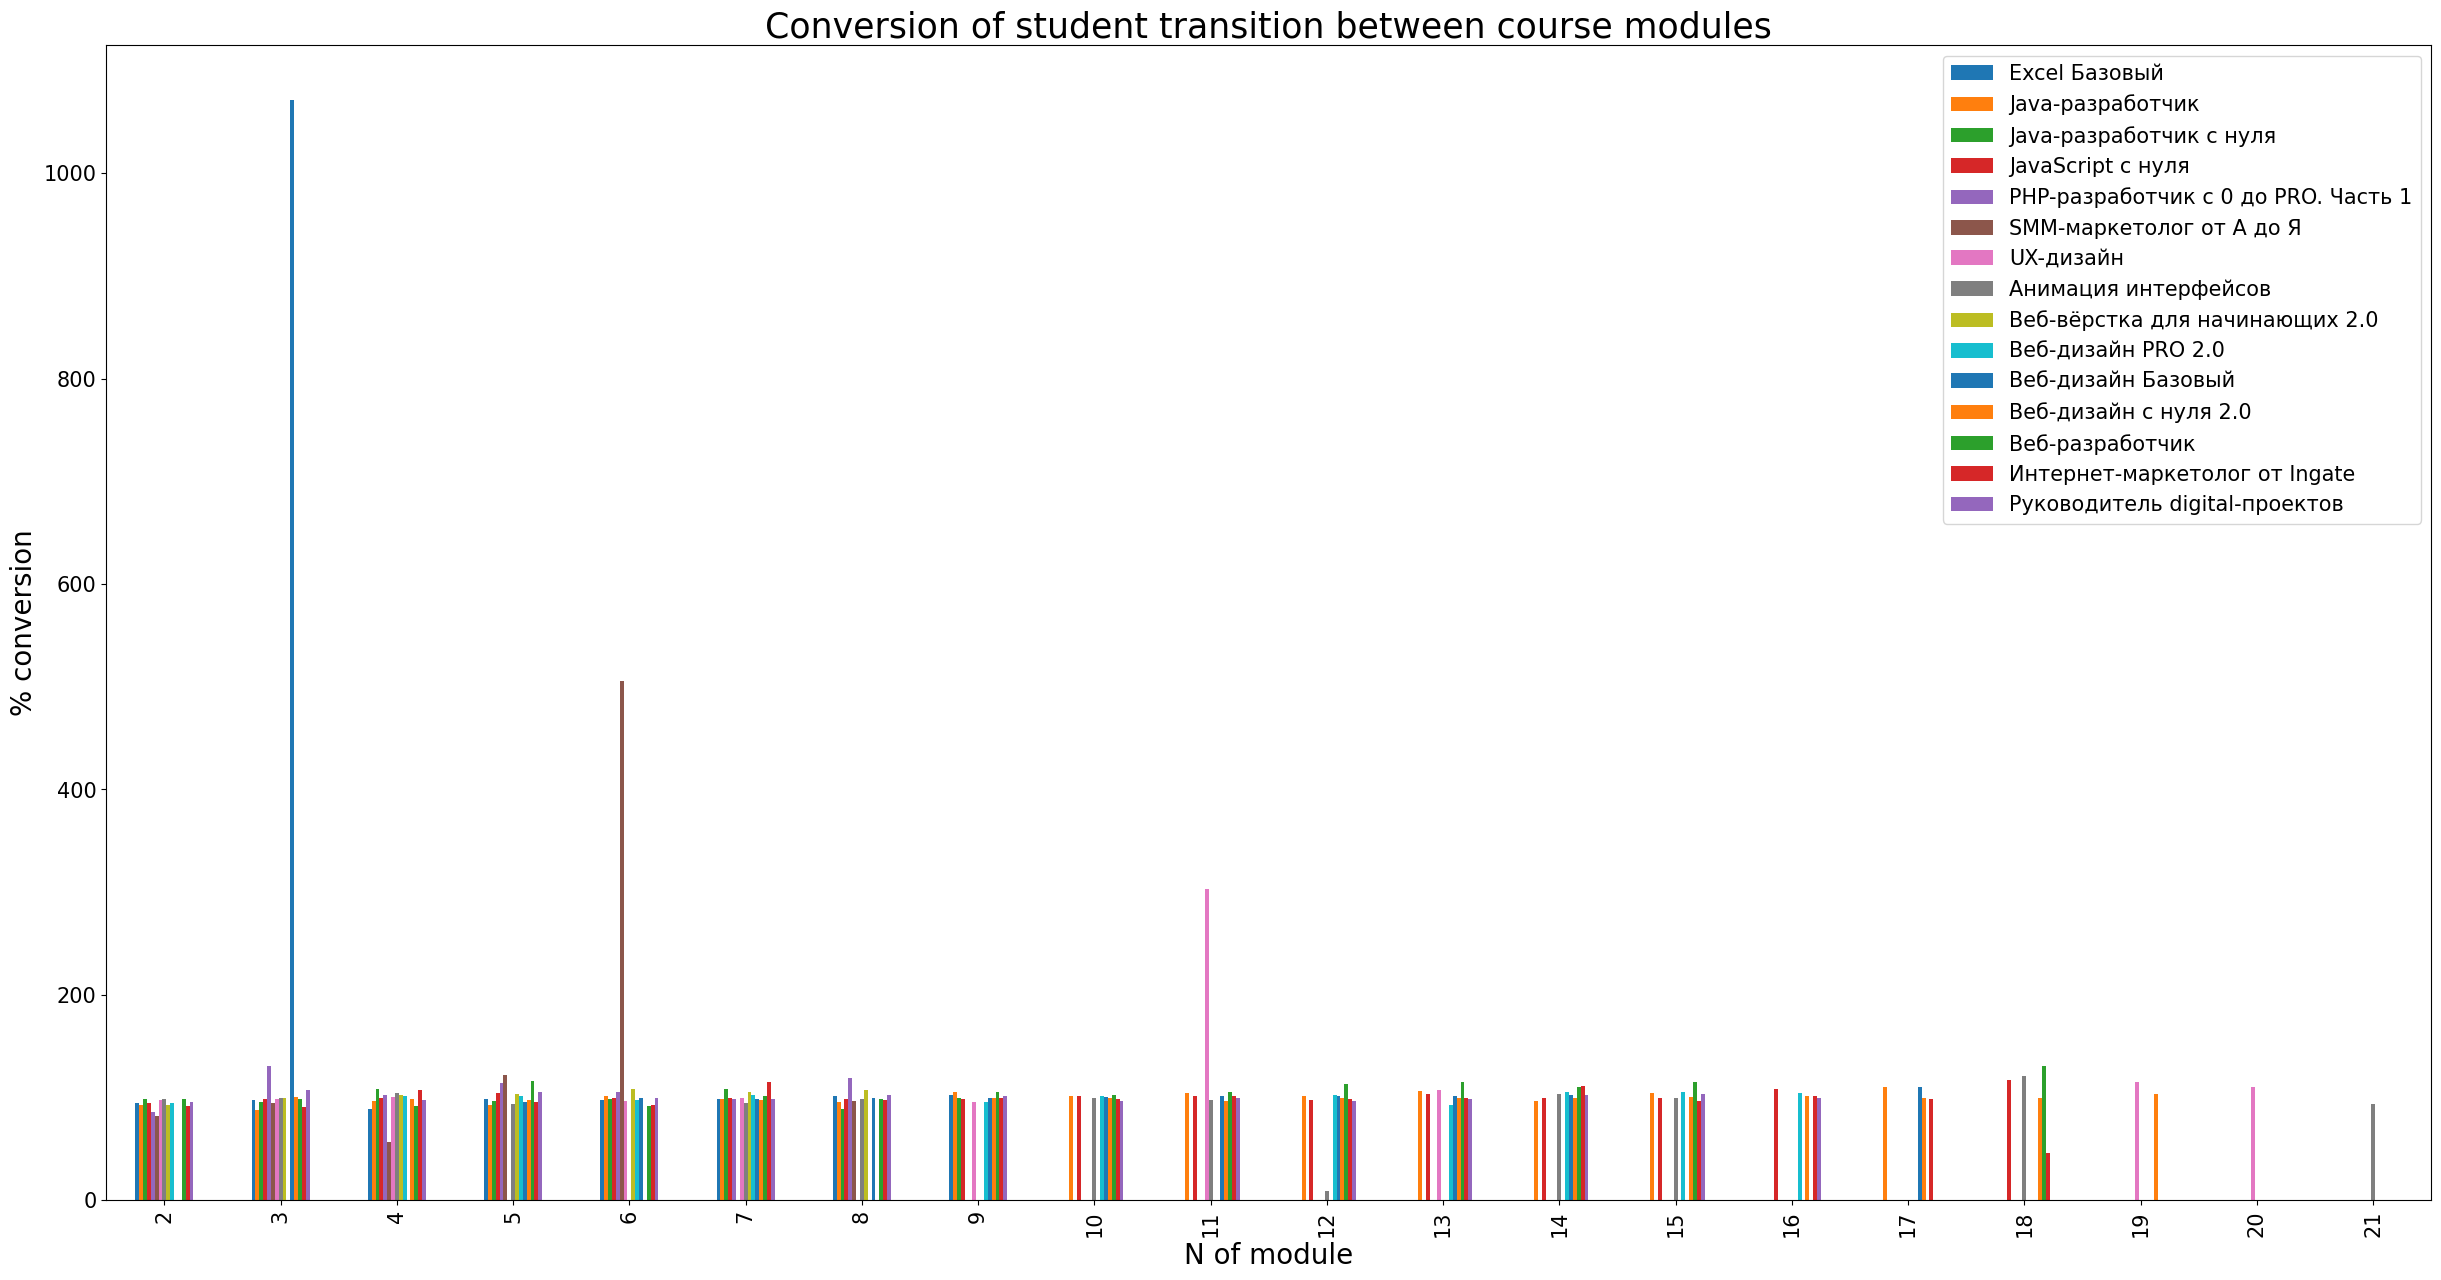

In [106]:
df_bar_conv = df_final_conv.groupby(['module_number', 'course_title']).conversion.max()
df_bar_conv 

fig, ax = plt.subplots(figsize=(30,15))
ax = df_bar_conv.unstack().plot(kind='bar', stacked=False, ax=ax)
ax.set_xlabel('N of module', fontsize = 20)
ax.set_ylabel('% conversion', fontsize = 20)
ax.set_label_size = 15
plt.tick_params(labelsize=15)
ax.legend(loc=1, fontsize=15)
ax.set_title('Conversion of student transition between course modules', fontsize=25)


##### 4.3. Horizontal bar-chart, reflecting the conversion of students from one module to another in each course. 15 charts.

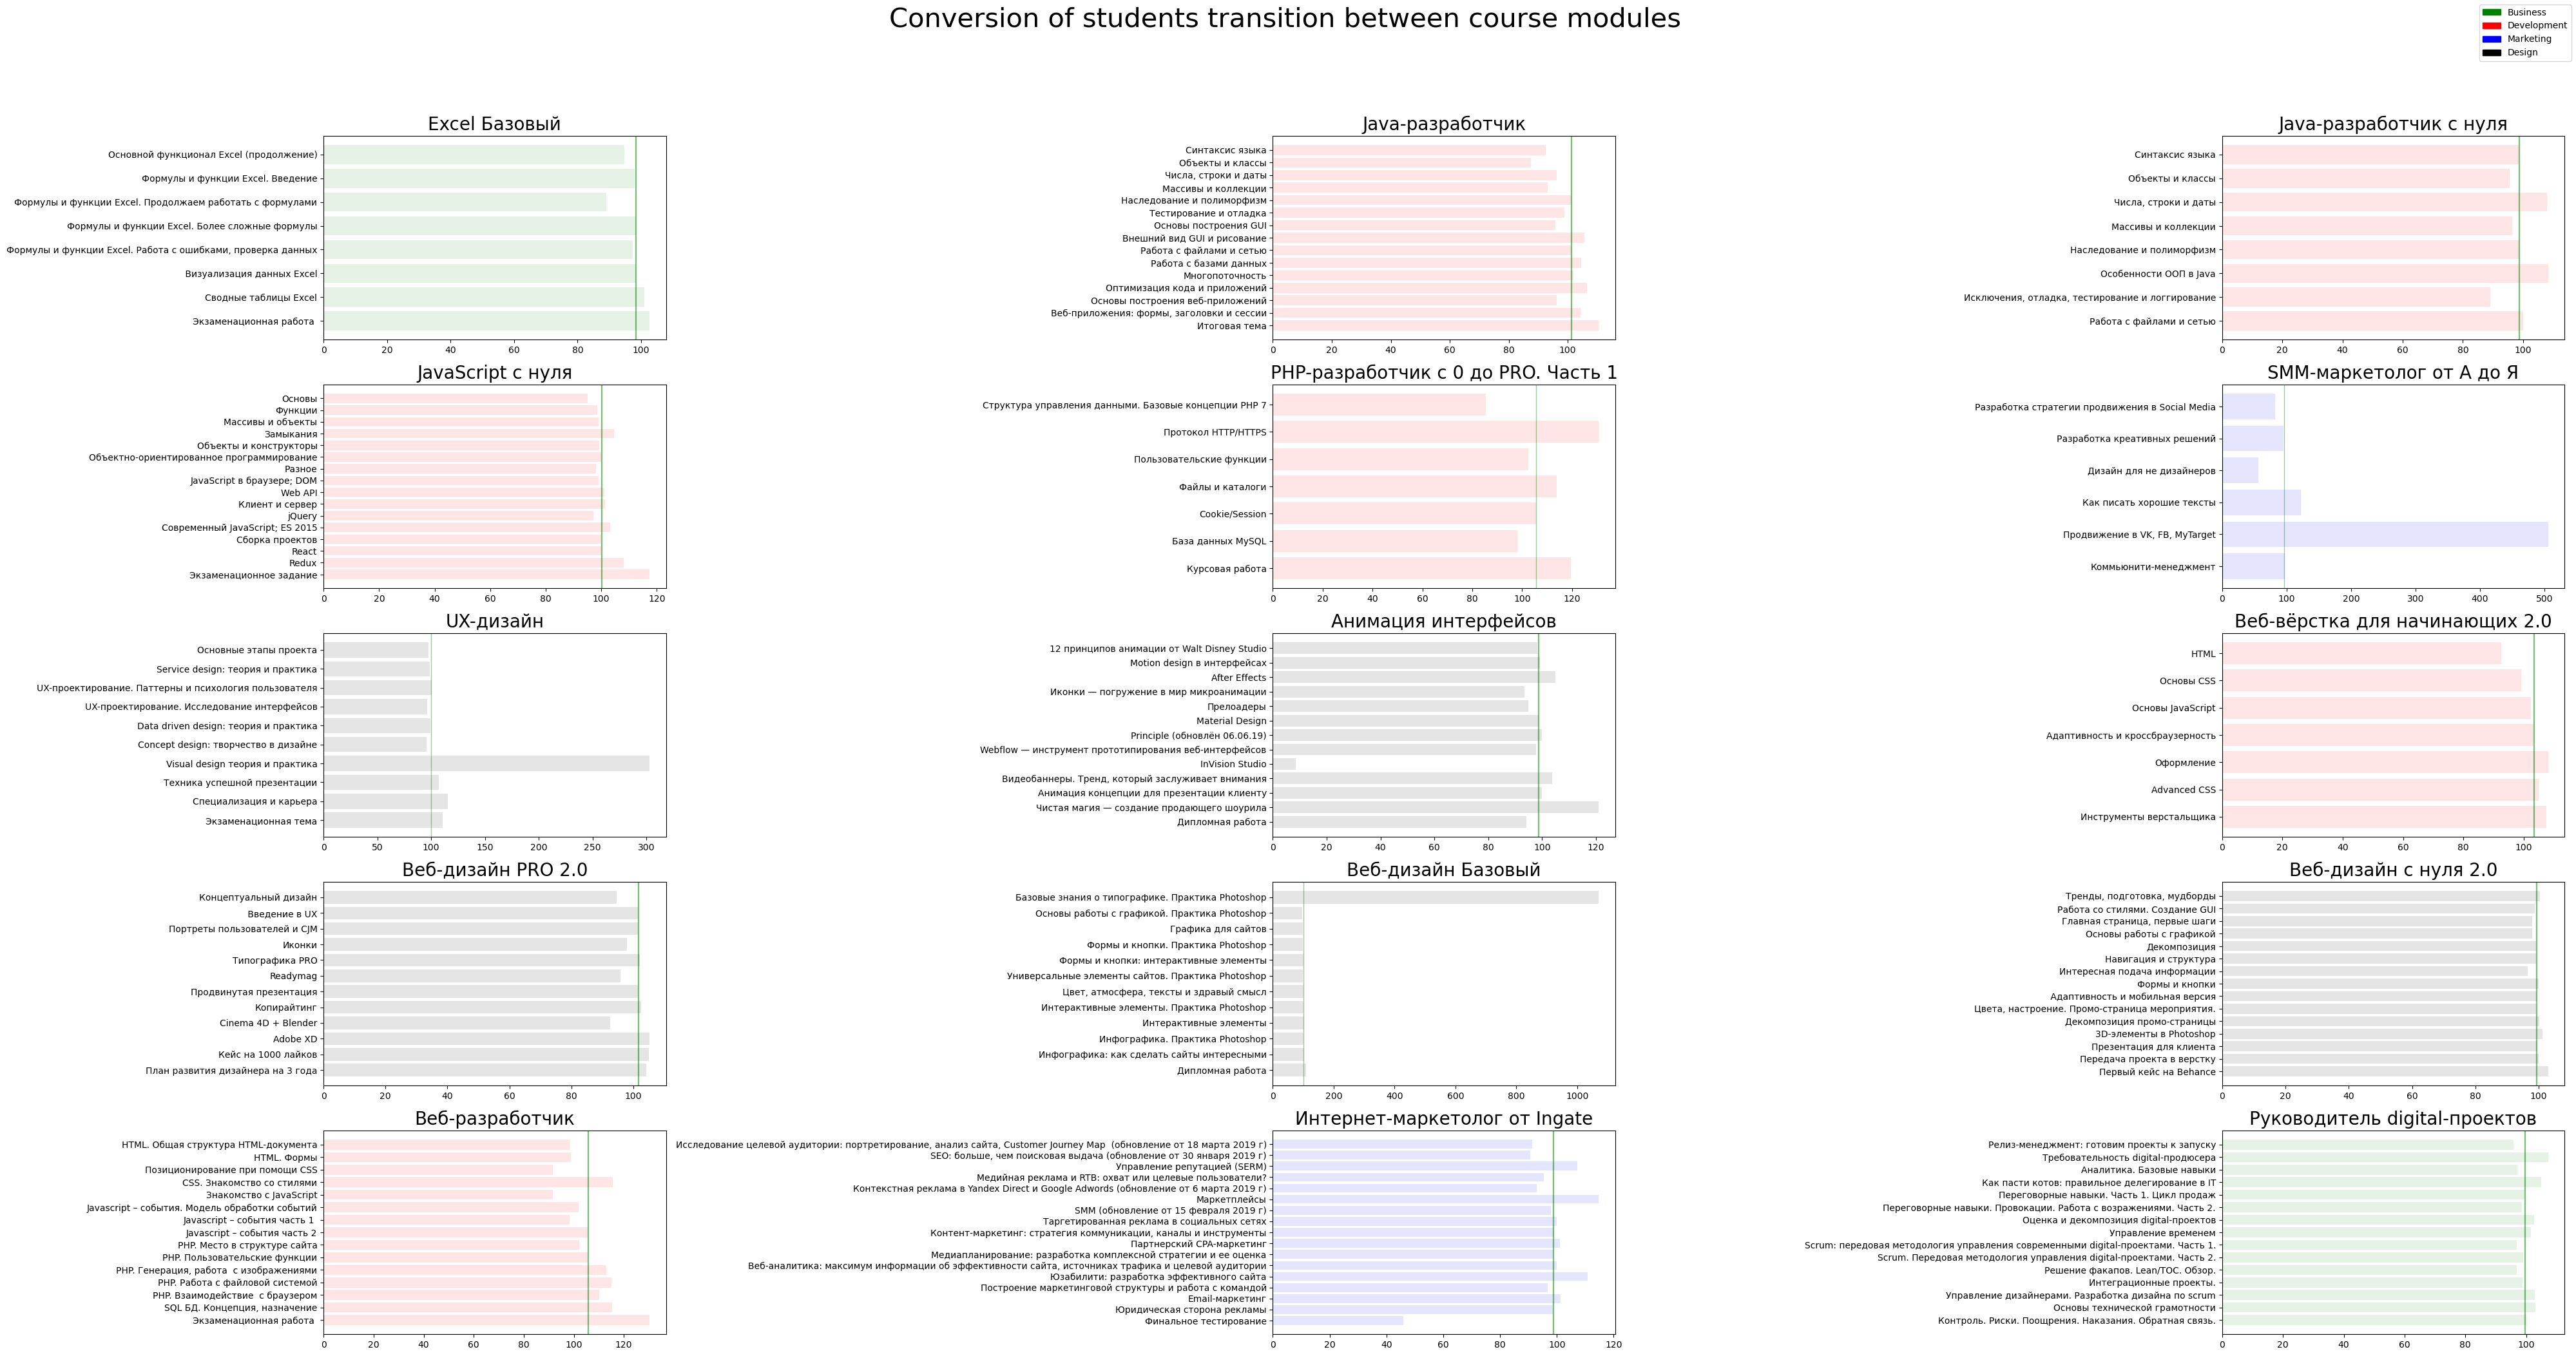

In [107]:
import matplotlib.patches as mpatches

df_course_conv = df_final_conv.groupby(['course_title', 'field', 'module_number', 'module_title']).conversion.max().to_frame().reset_index()
colors = {'Development':'red', 'Marketing':'blue', 'Business':'green', 'Design':'black'}
c_list = ['red', 'blue', 'green', 'black']
field_list = []
patches_list = []

fig, axes = plt.subplots(5,3, figsize=(40,20))

for ax,q in zip(axes.ravel(), df_course_conv['course_title'].unique()):
    each_data = df_course_conv[df_course_conv['course_title']==q].sort_values('module_number',ascending=False)
    field = list(each_data['field'][:1])[0]
    ax.barh(each_data.module_title, width = each_data.conversion, alpha = 0.1,  color = colors[field], label = field)
    ax.set_title(q, fontsize=20)
    ax.yaxis.label.set_visible(True)
    ax.xaxis.label.set_visible(False)
    ax.tick_params(axis="x", labelsize=10)
    ax.tick_params(axis="y", labelsize=10)
    med = each_data.conversion.median()
    ax.axvspan(xmin = med-0.1, xmax = med+0.1, color='green', linestyle='-', alpha = 0.4)
    ax.set(facecolor = "white")
    
    if field not in field_list:
        patch = mpatches.Patch(color= colors[field], label= field)
        field_list.append(field)
        patches_list.append(patch)

fig.legend(handles=patches_list, loc=1)
fig.suptitle('Conversion of students transition between course modules', y = 1.05, fontsize = 30)
plt.tight_layout()
plt.show()

##### 4.4. Conclusion

**1.** In theory, if permission to complete homework in a specific module is given only for completing homework in the previous module, then the bar chart sorted by module number should look like this:

n.mod

1    ===========    

2    =========

3    =====              

4    ===                 

or

n.mod


1 ==========

2 ==========

3 ==========

4 ==========


**2.** in our case, the appearance of the graph is quite chaotic. This may tell us either about an error in the data itself, or that completing assignments in previous modules is not a necessary condition for learning and passing assignments in the current module.

**3.** We can only follow some analytical conclusions based on the median conversion of modules by course. On average, less than 10% of students drop out. This indicates either the availability of an explanation of the theory in the course (not the high complexity of the test papers), or a sufficient amount of knowledge among students.

**4.** On the graph “Conversion of students moving between course modules” in module 6, we see a surge in conversion in the SMM course. This is most likely a data error.

# V. Performance metrics

### Task 

Sometimes students take courses that are beyond their reach. This may be due to both insufficient initial preparation and reasons related to the student’s low motivation. To improve the quality of content, it is useful to identify the cause. Based on the available data, come up with a student performance metric. **Justify it.** Identify such students in each course to provide producers with a list of problem students.

The student performance metric will be based on the time factor for completing the course. As a result of the analysis, 3 lists of students will be obtained:
- Those who failed the course (did not complete it).
- Those who completed the course at a good speed
- Those who completed the course with difficulty

In [135]:
df_hw_t = df_merged[df_merged['is_homework']==True]

In [136]:
df_s = df_merged.groupby(['course_title','student_id']).agg({'start_date': np.min}).reset_index()
# dataframe of start dates for students in each course

In [137]:
last_hw = df_hw_t.set_index('lesson_number').groupby(['course_title']).module_number.agg(['max', 'idxmax'])
last_hw.rename(columns={'max':'mod_n','idxmax':'les_n'}, inplace = True)
# module and lesson number with the last work on the course

In [138]:
df_limit = df_hw_t[df_hw_t['status']=='done'].merge(last_hw, how = 'left',\
                right_on = ['course_title'], left_on = ['course_title'])

In [139]:
df_f = df_limit[(df_limit['module_number']==df_limit['mod_n'])&(df_limit['lesson_number']==df_limit['les_n'])]\
        .groupby(['course_title','student_id']).finish_date.max().reset_index()
#end dates for students

Let's formulate the necessary hypothesis for further research:
     Who completed the last lesson containing homework also completed the last module

In [140]:
grads = df_s.merge(df_f, how = 'right', left_on = ['course_title', 'student_id'], right_on = ['course_title', 'student_id'])

In [141]:
grads['time_expenditure'] = grads['finish_date'] - grads['start_date'] #time spent by each student on the course
grads['t_e_int'] = grads['time_expenditure'].values.astype(np.int64)
time_exps_means = grads.groupby('course_title').t_e_int.mean().to_frame() #median time frame
time_exps_means['t_e'] = pd.to_timedelta(time_exps_means['t_e_int']) 
time_exps_means.drop(['t_e_int'], axis = 1, inplace = True)
grads.drop(['t_e_int'], axis = 1, inplace = True)

Let's divide the graduates into those who completed the course at a good pace. And those for whom the course caused difficulties, which resulted in more time compared to the average (median) time for completing the course.

In [144]:
#general dataframe for creating final lists of students:
grads_sort = grads.merge(time_exps_means, how = 'left', left_on = 'course_title', right_on = 'course_title') 

    #List of those students who completed the course at a good speed:
steady_progress_students = grads_sort[grads_sort['time_expenditure'] >= grads_sort['t_e']]\
                .drop(['start_date', 'finish_date', 'time_expenditure', 't_e'],axis = 1) 

#List of those students who passed the course with difficulty
heavy_going_students = grads_sort[grads_sort['time_expenditure'] < grads_sort['t_e']]\
                    .drop(['start_date', 'finish_date', 'time_expenditure', 't_e'], axis = 1)  

In [146]:
index_to_drop = grads.set_index(['course_title', 'student_id']).index
#we will identify those who did not complete the course by subtracting those who completed it by deleting their indexes

failures = df_hw_t.groupby(['course_title', 'student_id']).student_id.min().to_frame().rename({'student_id':'st_id'}, \
                                                                                axis='columns').drop(index_to_drop)
failures = failures.reset_index().drop('st_id', axis = 1)

As a result of this research, producers can be provided with 3 lists of students:

In [147]:
steady_progress_students

,course_title,student_id
1,Excel Базовый,0ac197e980c1389d8d8650088ec6df4b
2,Excel Базовый,0c787dd3c35e9e7dce5dd0bd8df3b20b
3,Excel Базовый,13797e6274a74eecc9a0f3e962fa1399
4,Excel Базовый,19ab2905811d1d4f6910e495bb84be19
7,Excel Базовый,26746c4a8ad33fbf1a7e731f85a56a6b
...,...,...
684,Руководитель digital-проектов,bda333fed381faada5c2745f3a583c47
685,Руководитель digital-проектов,c59ff0fc21a4fa4e4b2402df8b987abb
687,Руководитель digital-проектов,cc27ccdc90797472d3b20bf837191aee
692,Руководитель digital-проектов,db48a1ac7c08c892fe24f2692408e443


In [148]:
heavy_going_students 

,course_title,student_id
0,Excel Базовый,0a5bd3177cacfb357eaa2a495a5a381c
5,Excel Базовый,24884fb18a1699dbb966ecbf50c59d17
6,Excel Базовый,25c31528a49f79420dbe73d5c814536b
11,Excel Базовый,2f88b0de71263e142aa0509eaa92818d
12,Excel Базовый,30f60b3f6c3a3f4bab5e896c79937295
...,...,...
693,Руководитель digital-проектов,dd3633fc508aab63e251254bf9f69b8d
694,Руководитель digital-проектов,e3794e7c0fcef6e0682a6914497f4bf7
696,Руководитель digital-проектов,e52d093cb79135e38e420734654ed571
697,Руководитель digital-проектов,e77ebf1f6c9bb45bcc6b0ad5b9c4cba8


In [149]:
failures

,course_title,student_id
0,Excel Базовый,001b192f899a84496be98b41906246fc
1,Excel Базовый,006f0189ec657741ee4d53474c7a258d
2,Excel Базовый,0074621b6955733338ab0feb2a9a2100
3,Excel Базовый,0098ca12f73a56dadbf6099389305d80
4,Excel Базовый,0203a4ab8610441e866932fb899ed583
...,...,...
10108,Руководитель digital-проектов,fca3ef866ec16635ff9a34176747656d
10109,Руководитель digital-проектов,fd3a3ed82b4e1ea88680494282c4d7ca
10110,Руководитель digital-проектов,ff0f96efc5bc705cd50cda0baa15a879
10111,Руководитель digital-проектов,ff5e8cdf1578fda9a8128520c3c215bb
